In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, expon, beta, lognorm

import scipy, scipy.stats
from scipy.stats import binom
import scipy
import scipy.stats as stats
from statsmodels.stats import weightstats as stests
from scipy.stats import rankdata, tiecorrect, mannwhitneyu
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import cauchy
import mlxtend
from mlxtend.evaluate import permutation_test
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale=2)

# Задача 1.

## 1.1

$$X_1, ..., X_n \sim N(\mu, 1)$$
$$H_0: \mu_0 = 0$$
$$H_a: \mu_0 > 0$$

a) $\mu = 0$

$$T = \frac{\sqrt{n} (\bar{X} - \mu_0)}{\sigma} \sim N(0, 1)$$

$$t_{obs} = 2\bar{X} \sim N(0,1)$$

$$p-value = P(T > t_{obs} | H_0 true) = P(T > t_{obs} | \mu = 0) = 1 -  P(T \leq t_{obs} | \mu = 0) = 1 - F_{N(0,1)}(t_{obs})$$


$$t_{obs} + \frac{\sqrt{n}}{\sigma}(\mu_0 - \mu^{*}) = 2(\bar{X} - \mu^{*}) \sim N(0,1)$$

Обозначим
$$\tilde{t} = t_{obs} = 2\bar{X} \sim N(0,1)$$

Тогда
$$F_{p-val}(Q) = P(p-val \leq Q) = P(1 - F_{N(0,1)}(\tilde{t}) \leq Q) = 1 - P(F_{N(0,1)}(\tilde{t}) \leq 1 -  Q) = 1 - P(\tilde{t} \leq F^{-1}_{N(0,1)}(1-Q)) = $$
$$ = 1 - F_{N(0,1)}(F^{-1}_{N(0,1)}(1-Q)) = Q$$

То есть $p-value \sim U[0,1]$ при верной $H_0$

In [589]:
times = 1000
n = 4
p_val_null = []
p_val_alt = []

for i in range(times):
    # true null
    X = norm.rvs(loc=0, scale=1, size=n)
    _, p = stats.ttest_1samp(X, popmean=0)
    p_val_null.append(p/2)
    
    # true alternative
    X = norm.rvs(loc=0.5, scale=1, size=n)
    _, p = stats.ttest_1samp(X, popmean=0)
    p_val_alt.append(p/2)
    
    X = norm.rvs(loc=1, scale=1, size=n)
    _, p = stats.ttest_1samp(X, popmean=0)
    p_val_alt.append(p/2)

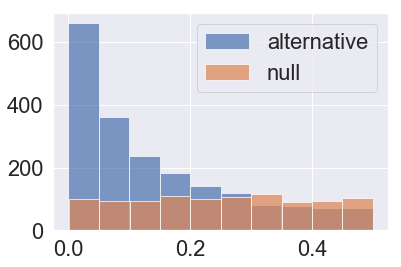

In [590]:
plt.hist(p_val_alt, alpha = 0.7, label='alternative')
plt.hist(p_val_null, alpha = 0.7, label='null')
plt.legend()
plt.show()

## 1.2

In [591]:
from scipy.stats import expon

times = 200
p2_val_null = [[] for i in range(3)]
p2_val_alt = [[] for i in range(3)]
ns = [4, 10, 100]

for j in range(3):
    n = ns[j]
    for i in range(times):
        # true null
        X = expon.rvs(loc=1, scale=1, size=n)
        _, p = stats.ttest_1samp(X, popmean=1)
        p2_val_null[j].append(p / 2)
        # true alternative
        for mu in [1.5, 2, 3]:
            X = expon.rvs(loc=mu, scale=1, size=n)
            _, p = stats.ttest_1samp(X, popmean=1)
            p2_val_alt[j].append(p / 2)
            
         

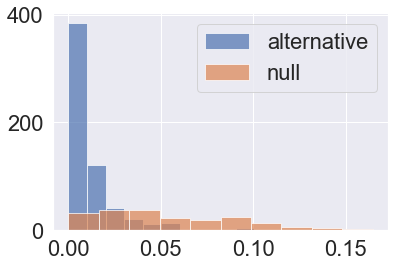

In [592]:
plt.hist(p2_val_alt[0], alpha = 0.7, label='alternative')
plt.hist(p2_val_null[0], alpha = 0.7, label='null')
plt.legend()
plt.show()

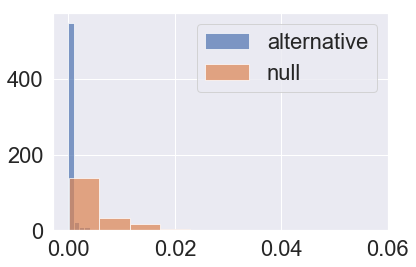

In [593]:
plt.hist(p2_val_alt[1], alpha = 0.7, label='alternative')
plt.hist(p2_val_null[1], alpha = 0.7, label='null')
plt.legend()
plt.show()

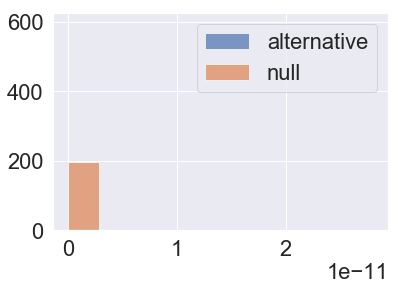

In [594]:
plt.hist(p2_val_alt[2], alpha = 0.7, label='alternative')
plt.hist(p2_val_null[2], alpha = 0.7, label='null')
plt.legend()
plt.show()

# Задача 2.

In [3]:
alpha = 0.05
Ns = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100]
Nr = 10**3

In [65]:
def cauchy3(X):
    new_X = []
    for el in X:
        if el >= -3 and el <=3:
            new_X.append(el)
    return np.array(new_X)

In [70]:
def my_cauchy(n, loc, scale):
    X = []
    while len(X) < n:
        tmp = cauchy.rvs(loc=loc, scale=scale, size=n)
        X.extend(cauchy3(tmp))
    if len(X) > n:
        return np.array(X[:n])
    return np.array(X)

### 2.A. Одинаковый тип распределения и одинаковые сигмы.

#### 2.A.a) Эксперимент для альфа

In [99]:
Na_t, Na_mww, Na_z, Na_sign, Na_perm = [], [], [], [], []
logNa_t, logNa_mww, logNa_z, logNa_sign, logNa_perm = [], [], [], [], []
Ca_t, Ca_mww, Ca_z, Ca_sign, Ca_perm = [], [], [], [], []

for n in Ns:
    Np_t, Np_mww, Np_z, Np_sign, Np_perm = [], [], [], [], []
    logNp_t, logNp_mww, logNp_z, logNp_sign, logNp_perm = [], [], [], [], []
    Cp_t, Cp_mww, Cp_z, Cp_sign, Cp_perm = [], [], [], [], []
    
    for j in range(Nr):
        ####################################
        # Norm
        X = norm.rvs(loc=0, scale=1, size=n)
        Y = norm.rvs(loc=0, scale=1, size=n)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=True)
        Np_t.append(p_t)
        
        # z
        z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
        Np_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        Np_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        Np_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        Np_perm.append(p_p)
        
        ######################################
        # LogNorm
        X = lognorm.rvs(s=1, loc=0, scale=1, size=n)
        Y = lognorm.rvs(s=1, loc=0, scale=1, size=n)
        # X = np.log(X)
        # Y = np.log(Y)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=True)
        logNp_t.append(p_t)
        
        # z
        z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
        logNp_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        logNp_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        logNp_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        logNp_perm.append(p_p)
        
        
        ######################################
        # Cauchy
        X = my_cauchy(n, 0, 1)
        Y = my_cauchy(n, 0, 1)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=True)
        Cp_t.append(p_t)
        
        # z 3
        z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
        Cp_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        Cp_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        Cp_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        Cp_perm.append(p_p)
    
    Na_t.append((Np_t < (alpha * np.ones(Nr))).sum() / Nr)
    Na_mww.append((Np_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    Na_z.append((Np_z < (alpha * np.ones(Nr))).sum() / Nr)
    Na_sign.append((Np_sign < (alpha * np.ones(Nr))).sum() / Nr)
    Na_perm.append((Np_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    logNa_t.append((logNp_t < (alpha * np.ones(Nr))).sum() / Nr)
    logNa_mww.append((logNp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    logNa_z.append((logNp_z < (alpha * np.ones(Nr))).sum() / Nr)
    logNa_sign.append((logNp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    logNa_perm.append((logNp_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    Ca_t.append((Cp_t < (alpha * np.ones(Nr))).sum() / Nr)
    Ca_mww.append((Cp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    Ca_z.append((Cp_z < (alpha * np.ones(Nr))).sum() / Nr)
    Ca_sign.append((Cp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    Ca_perm.append((Cp_perm < (alpha * np.ones(Nr))).sum() / Nr)
        

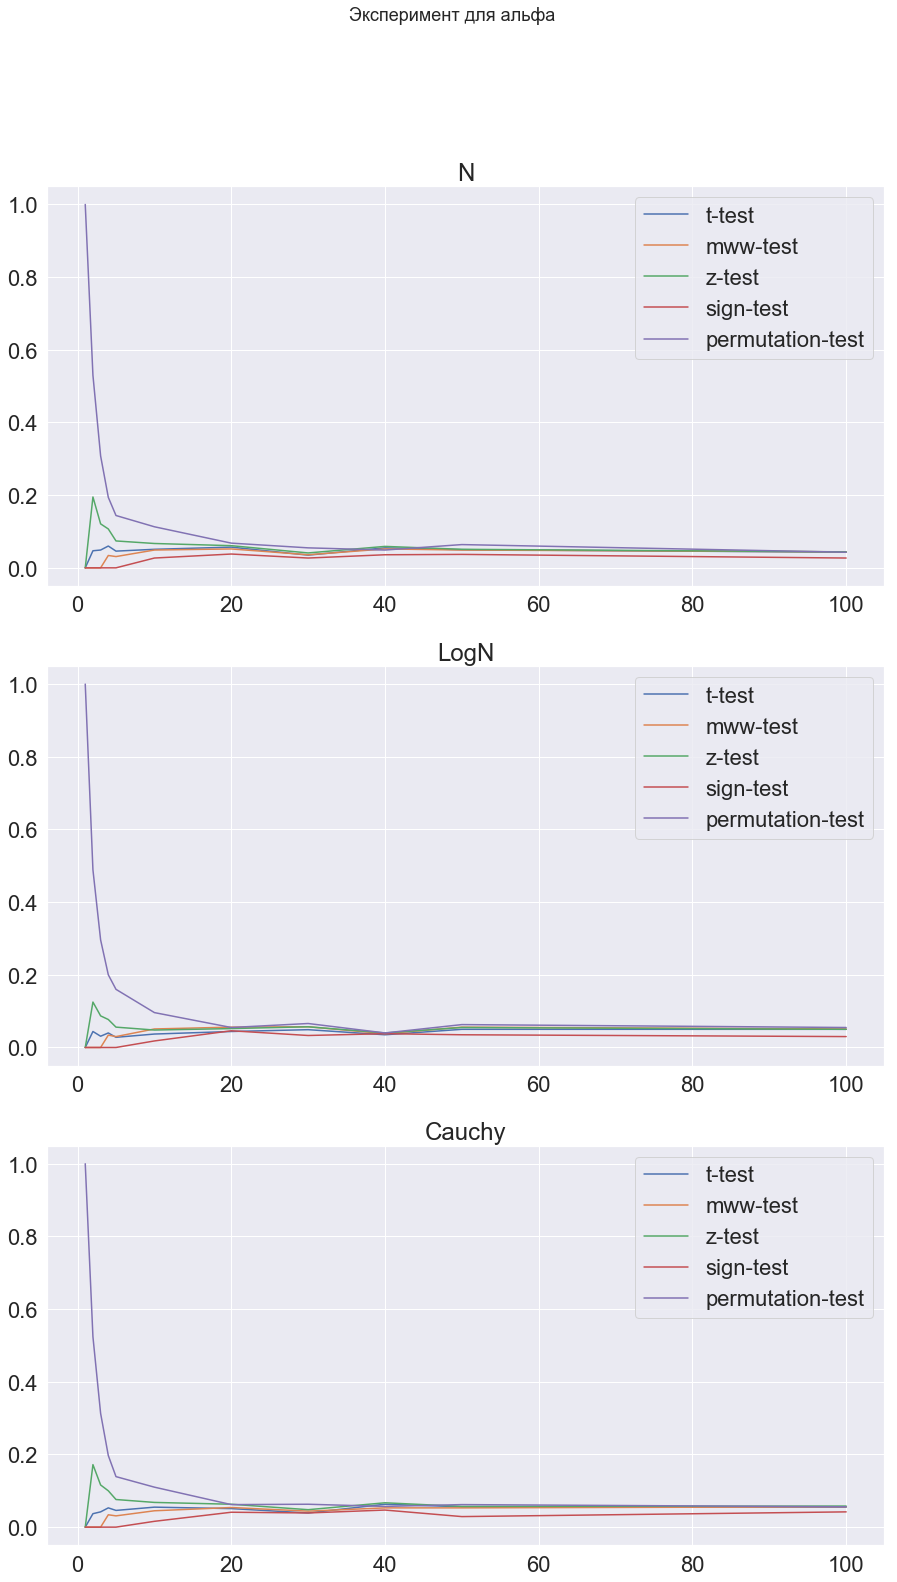

In [119]:
fig, ax = plt.subplots(3, 1, figsize=(15,25))

plt.suptitle('Эксперимент для альфа', fontsize=18)

ax[0].plot(Ns, Na_t, label='t-test')
ax[0].plot(Ns, Na_mww, label='mww-test')
ax[0].plot(Ns, Na_z, label='z-test')
ax[0].plot(Ns, Na_sign, label='sign-test')
ax[0].plot(Ns, Na_perm, label='permutation-test')
ax[0].legend()
ax[0].title.set_text('N')

ax[1].plot(Ns, logNa_t, label='t-test')
ax[1].plot(Ns, logNa_mww, label='mww-test')
ax[1].plot(Ns, logNa_z, label='z-test')
ax[1].plot(Ns, logNa_sign, label='sign-test')
ax[1].plot(Ns, logNa_perm, label='permutation-test')
ax[1].legend()
ax[1].title.set_text('LogN')

ax[2].plot(Ns, Ca_t, label='t-test')
ax[2].plot(Ns, Ca_mww, label='mww-test')
ax[2].plot(Ns, Ca_z, label='z-test')
ax[2].plot(Ns, Ca_sign, label='sign-test')
ax[2].plot(Ns, Ca_perm, label='permutation-test')
ax[2].legend()
ax[2].title.set_text('Cauchy')


#### 2.A.b) Эксперимент для мощности.

In [176]:
Nb_t, Nb_mww, Nb_z, Nb_sign, Nb_perm = [], [], [], [], []
logNb_t, logNb_mww, logNb_z, logNb_sign, logNb_perm = [], [], [], [], []
Cb_t, Cb_mww, Cb_z, Cb_sign, Cb_perm = [], [], [], [], []

for n in Ns:
    for mu in np.arange(0.1, 3, 0.1):
        Np_t, Np_mww, Np_z, Np_sign, Np_perm = [], [], [], [], []
        logNp_t, logNp_mww, logNp_z, logNp_sign, logNp_perm = [], [], [], [], []
        Cp_t, Cp_mww, Cp_z, Cp_sign, Cp_perm = [], [], [], [], []
        
        for j in range(Nr):
            ####################################
            # Norm
            X = norm.rvs(loc=mu, scale=1, size=n)
            Y = norm.rvs(loc=mu, scale=1, size=n)
        
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=True)
            Np_t.append(p_t)
        
            # z
            z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
            Np_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            Np_mww.append(p_m)
        
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            Np_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            Np_perm.append(p_p)
        
            ######################################
            # LogNorm
            X = lognorm.rvs(s=1, loc=mu, scale=1, size=n)
            Y = lognorm.rvs(s=1, loc=mu, scale=1, size=n)
            # X = np.log(X)
            # Y = np.log(Y)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=True)
            logNp_t.append(p_t)
            
            # z
            z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
            logNp_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            logNp_mww.append(p_m)
             
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            logNp_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            logNp_perm.append(p_p)
            
            
            ######################################
            # Cauchy
            X = my_cauchy(n, mu, 1)
            Y = my_cauchy(n, mu, 1)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=True)
            Cp_t.append(p_t)
            
            # z 3
            z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
            Cp_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            Cp_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            Cp_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            Cp_perm.append(p_p)
    
        Nb_t.append((Np_t < (alpha * np.ones(Nr))).sum() / Nr)
        Nb_mww.append((Np_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        Nb_z.append((Np_z < (alpha * np.ones(Nr))).sum() / Nr)
        Nb_sign.append((Np_sign < (alpha * np.ones(Nr))).sum() / Nr)
        Nb_perm.append((Np_perm < (alpha * np.ones(Nr))).sum() / Nr)
        
        logNb_t.append((logNp_t < (alpha * np.ones(Nr))).sum() / Nr)
        logNb_mww.append((logNp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        logNb_z.append((logNp_z < (alpha * np.ones(Nr))).sum() / Nr)
        logNb_sign.append((logNp_sign < (alpha * np.ones(Nr))).sum() / Nr)
        logNb_perm.append((logNp_perm < (alpha * np.ones(Nr))).sum() / Nr)
        
        Cb_t.append((Cp_t < (alpha * np.ones(Nr))).sum() / Nr)
        Cb_mww.append((Cp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        Cb_z.append((Cp_z < (alpha * np.ones(Nr))).sum() / Nr)
        Cb_sign.append((Cp_sign < (alpha * np.ones(Nr))).sum() / Nr)
        Cb_perm.append((Cp_perm < (alpha * np.ones(Nr))).sum() / Nr)

In [565]:
musN1 = [[[] for j in range(5)] for i in range(29)]
muslogN1 = [[[] for j in range(5)] for i in range(29)]
musC1 = [[[] for j in range(5)] for i in range(29)]

In [566]:
for i_mu in range(len(np.arange(0.1, 3, 0.1))):
    for j in np.arange(i_mu, 319, 29):
        musN1[i_mu][0].append(Nb_t[j])
        musN1[i_mu][1].append(Nb_mww[j])
        musN1[i_mu][2].append(Nb_z[j])
        musN1[i_mu][3].append(Nb_sign[j])
        musN1[i_mu][4].append(Nb_perm[j])
        
        muslogN1[i_mu][0].append(logNb_t[j])
        muslogN1[i_mu][1].append(logNb_mww[j])
        muslogN1[i_mu][2].append(logNb_z[j])
        muslogN1[i_mu][3].append(logNb_sign[j])
        muslogN1[i_mu][4].append(logNb_perm[j])
        
        musC1[i_mu][0].append(Cb_t[j])
        musC1[i_mu][1].append(Cb_mww[j])
        musC1[i_mu][2].append(Cb_z[j])
        musC1[i_mu][3].append(Cb_sign[j])
        musC1[i_mu][4].append(Cb_perm[j])

In [550]:
mus = np.arange(0.1, 3, 0.1)

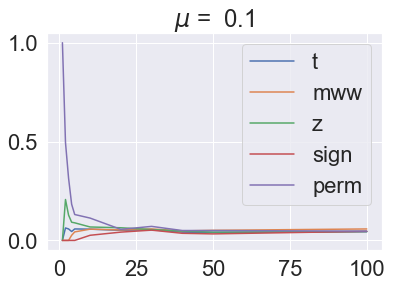

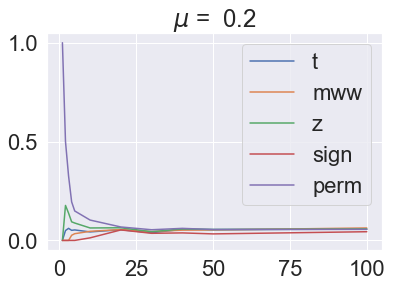

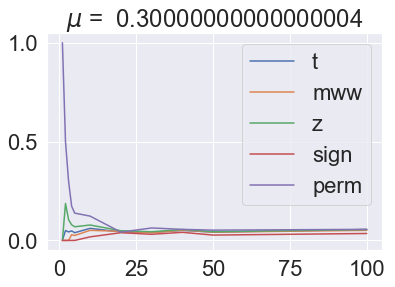

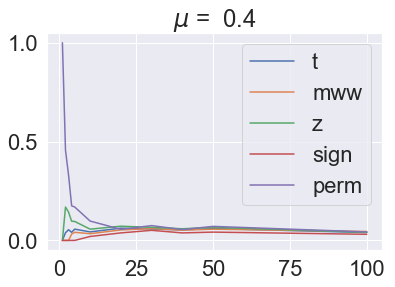

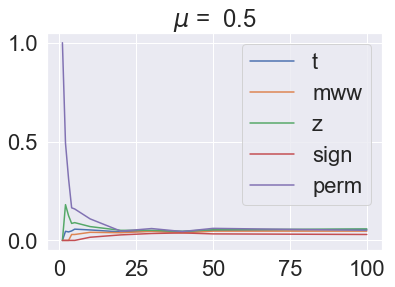

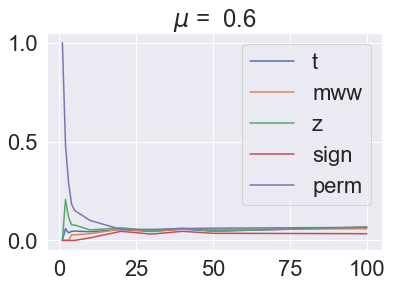

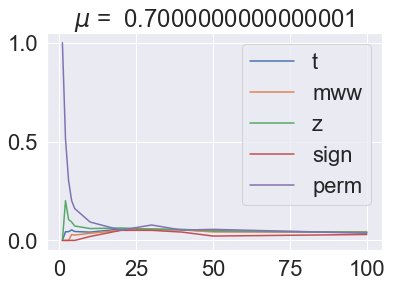

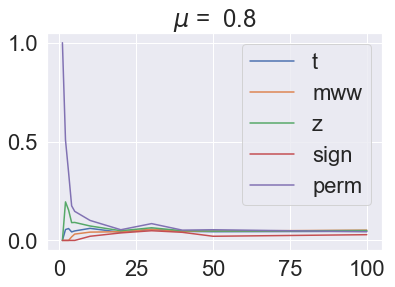

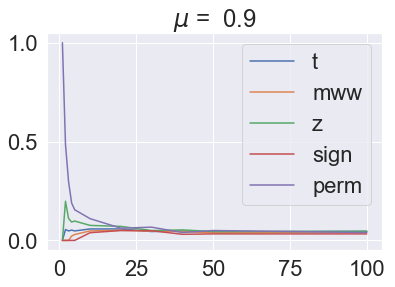

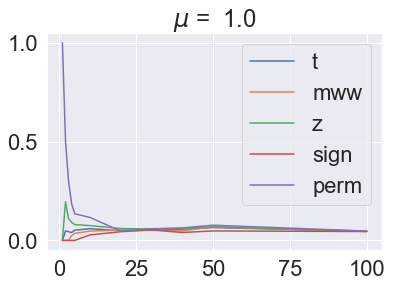

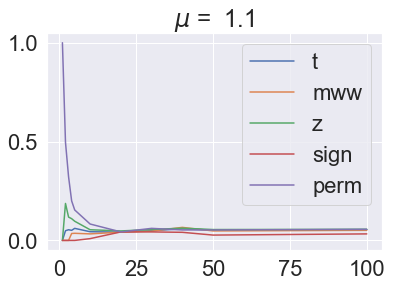

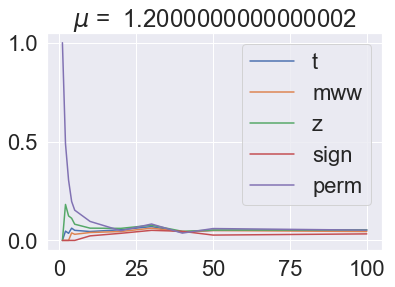

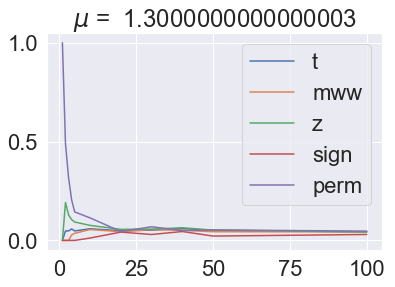

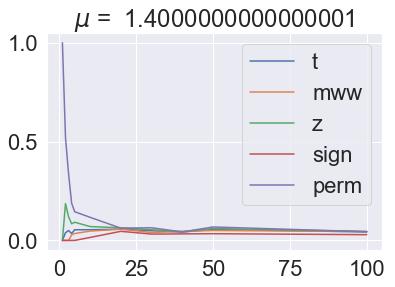

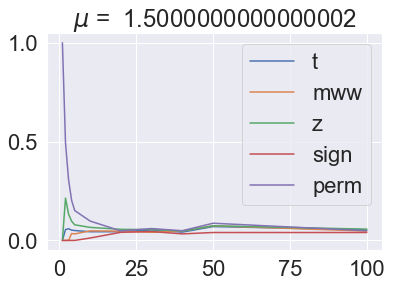

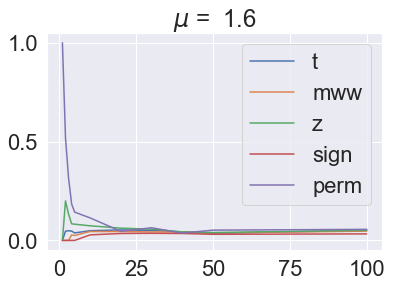

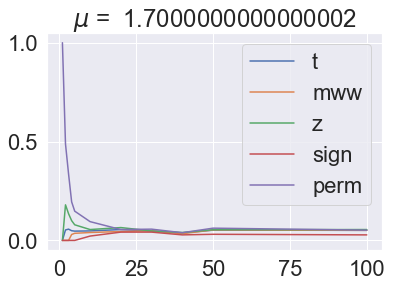

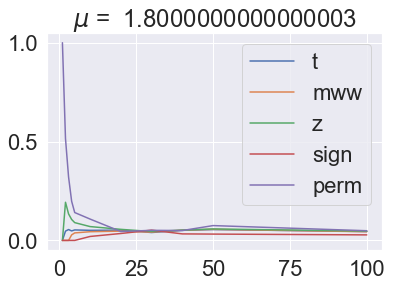

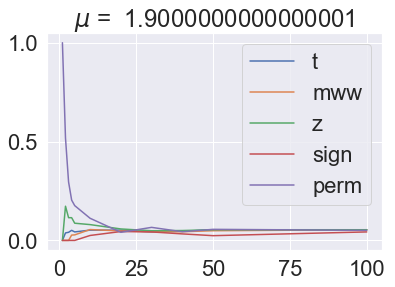

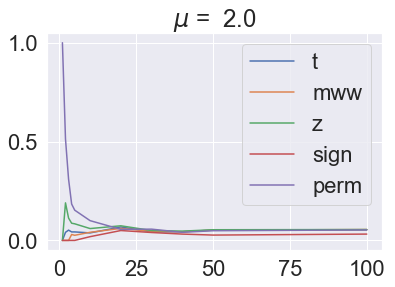

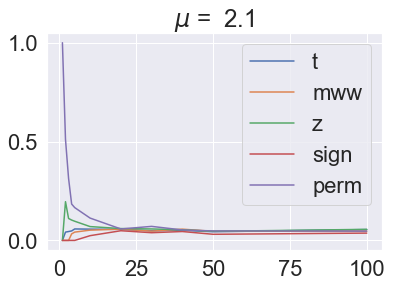

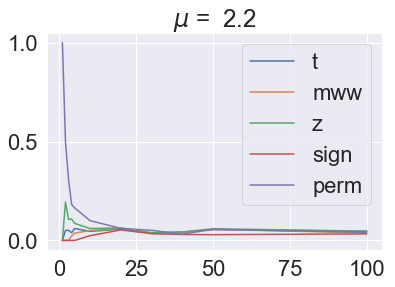

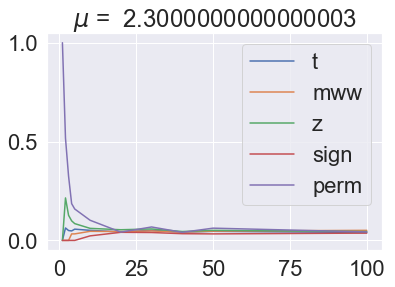

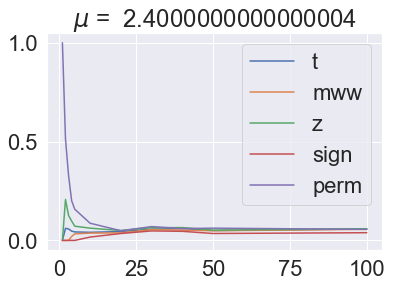

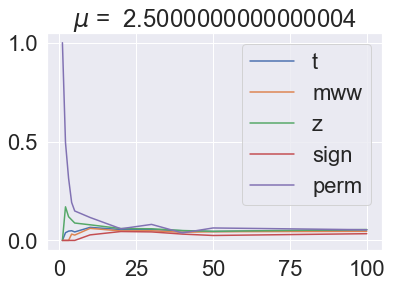

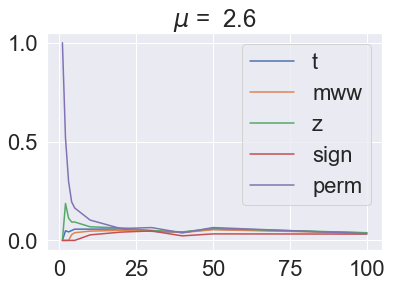

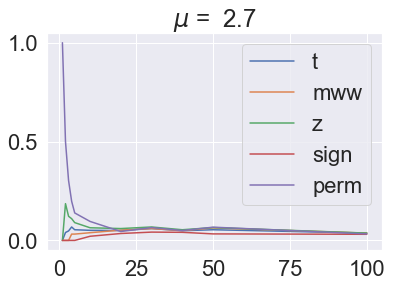

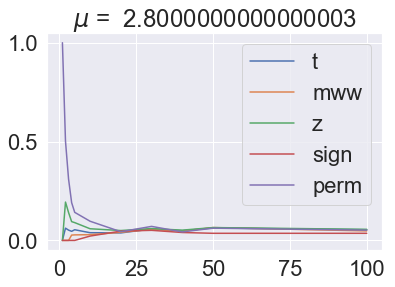

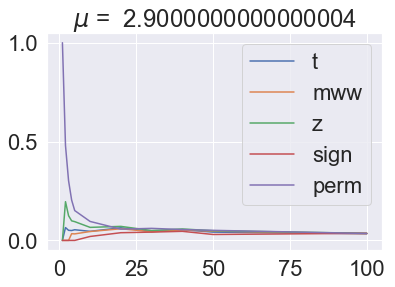

In [581]:
for i_mu in range(len(np.arange(0.1, 3, 0.1))):
    plt.figure()
    plt.title('$\mu$ =  {}'.format(mus[i_mu]))
    plt.plot(Ns, musN1[i_mu][0], label='t')
    plt.plot(Ns, musN1[i_mu][1], label='mww')
    plt.plot(Ns, musN1[i_mu][2], label='z')
    plt.plot(Ns, musN1[i_mu][3], label='sign')
    plt.plot(Ns, musN1[i_mu][4], label='perm')
    plt.legend()
    plt.show()

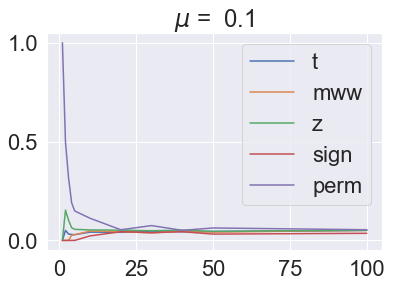

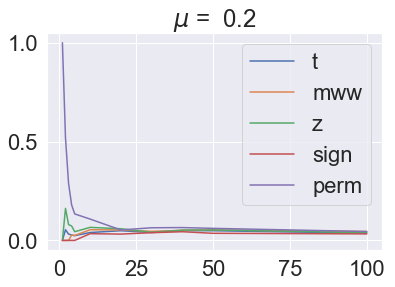

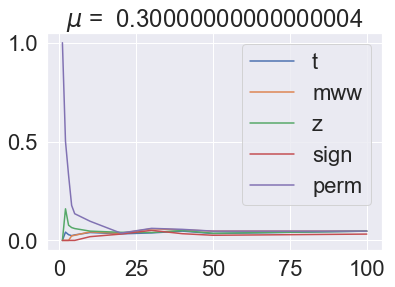

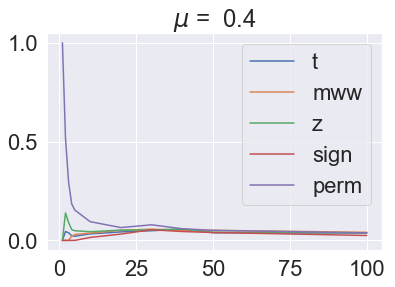

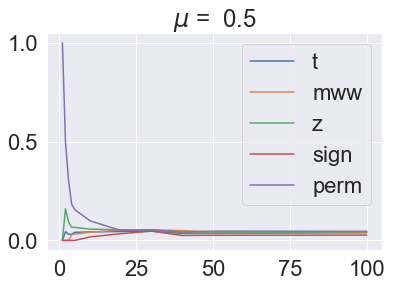

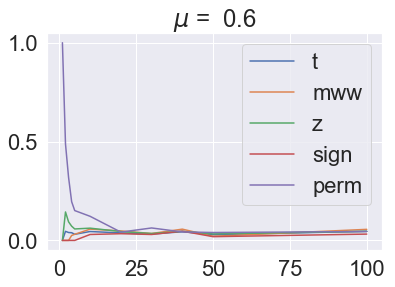

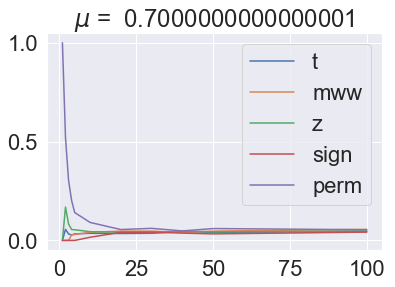

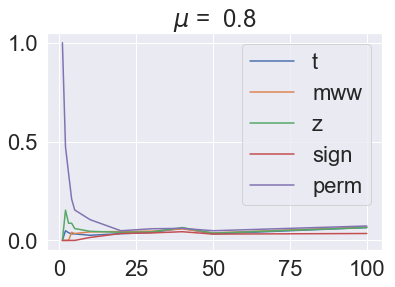

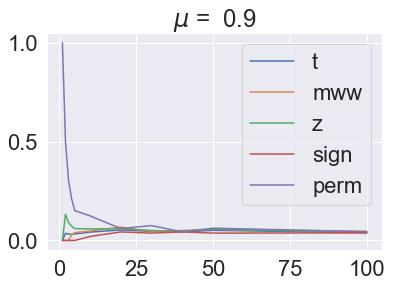

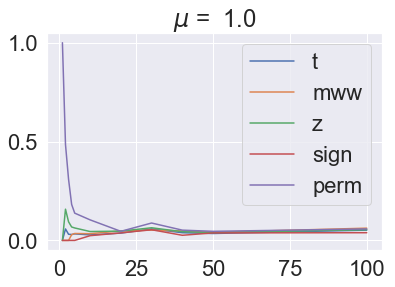

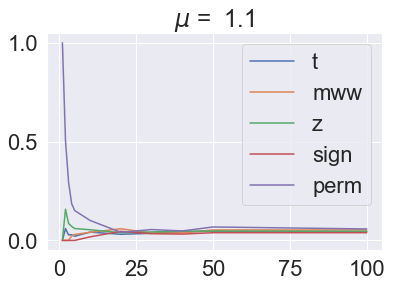

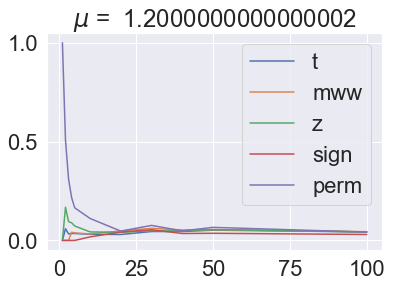

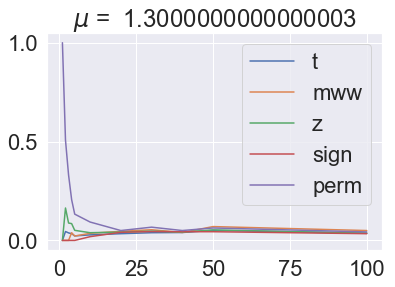

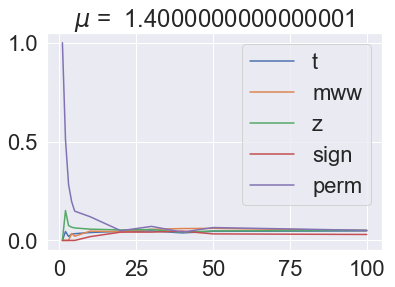

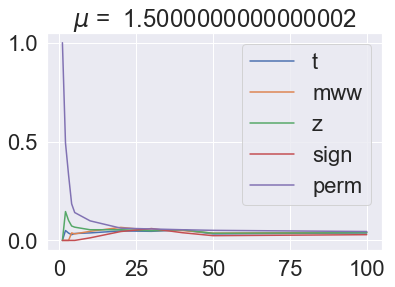

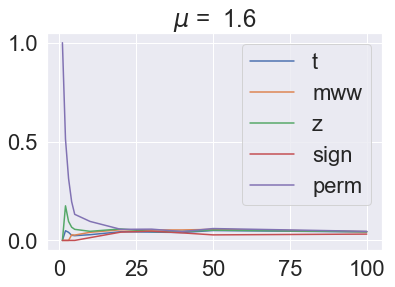

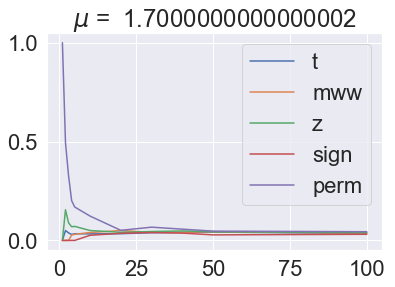

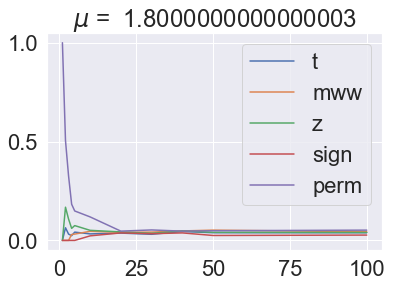

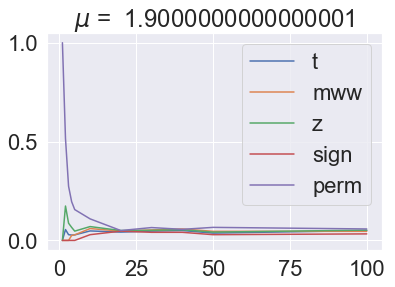

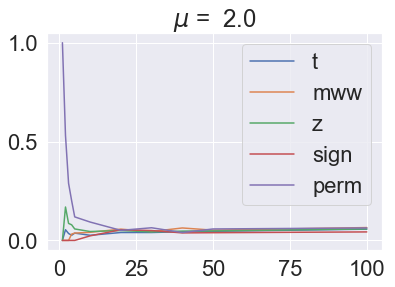

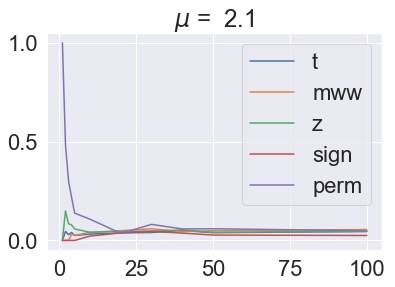

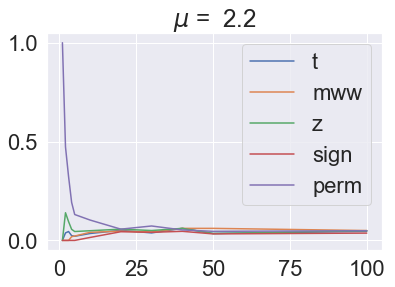

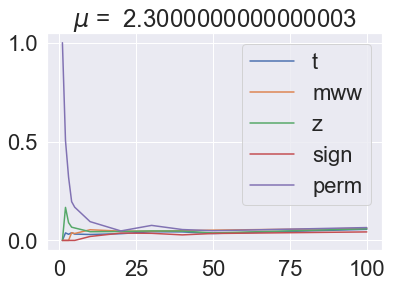

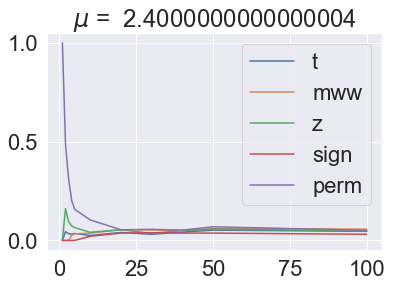

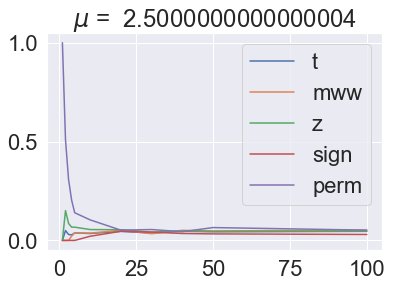

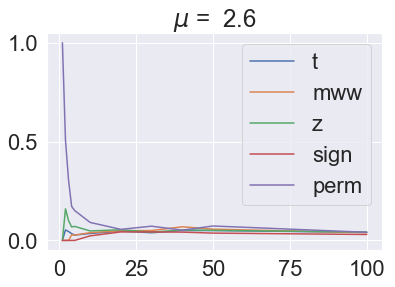

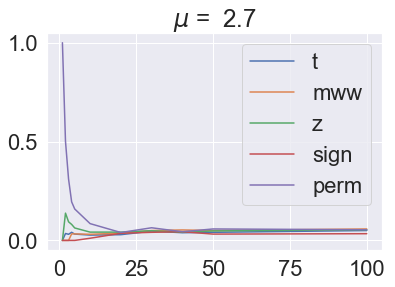

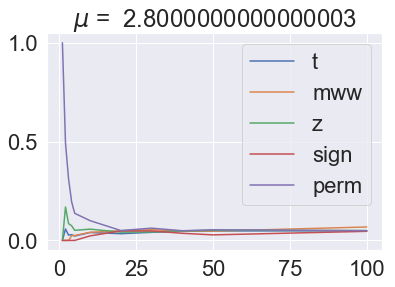

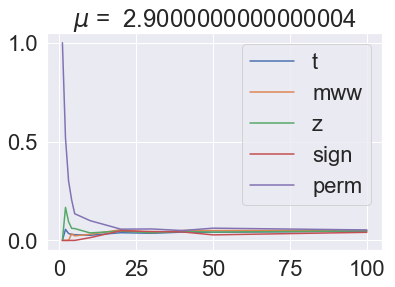

In [582]:
for i_mu in range(len(np.arange(0.1, 3, 0.1))):
    plt.figure()
    plt.title('$\mu$ =  {}'.format(mus[i_mu]))
    plt.plot(Ns, muslogN1[i_mu][0], label='t')
    plt.plot(Ns, muslogN1[i_mu][1], label='mww')
    plt.plot(Ns, muslogN1[i_mu][2], label='z')
    plt.plot(Ns, muslogN1[i_mu][3], label='sign')
    plt.plot(Ns, muslogN1[i_mu][4], label='perm')
    plt.legend()
    plt.show()

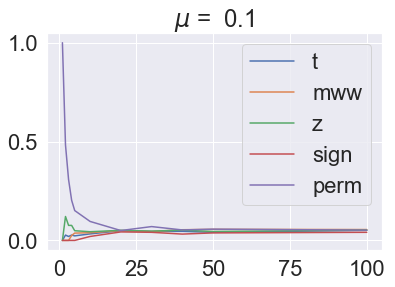

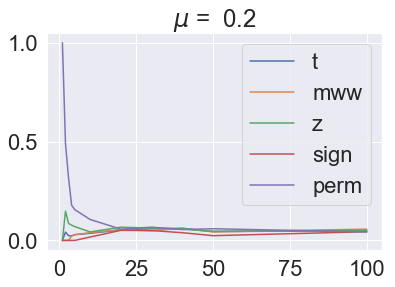

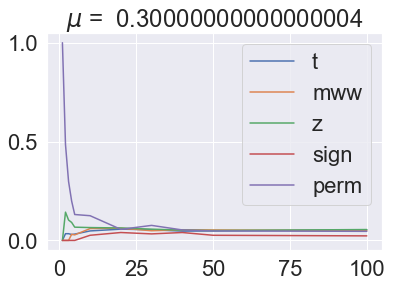

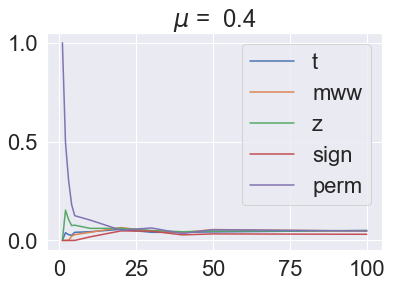

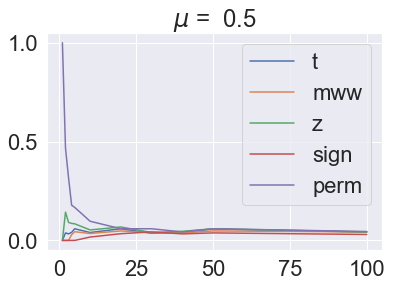

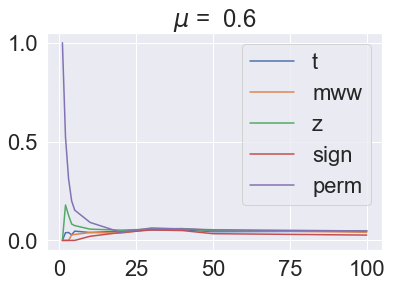

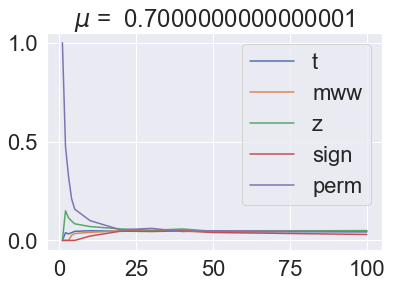

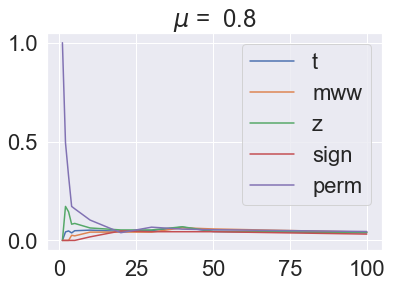

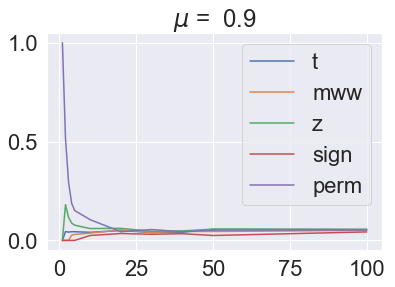

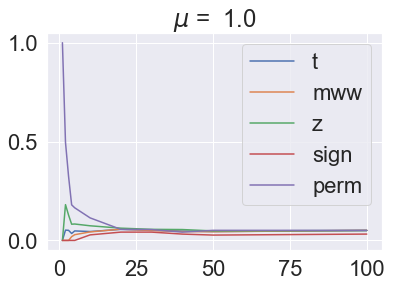

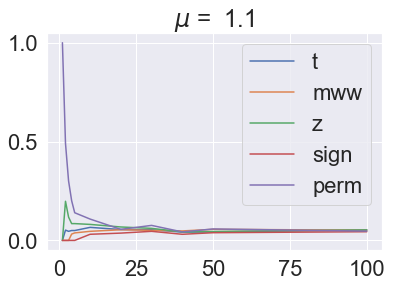

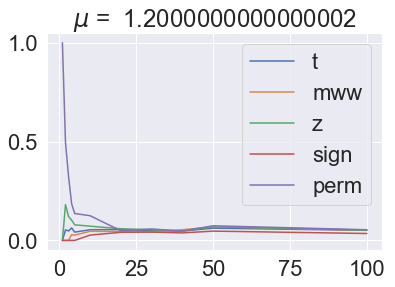

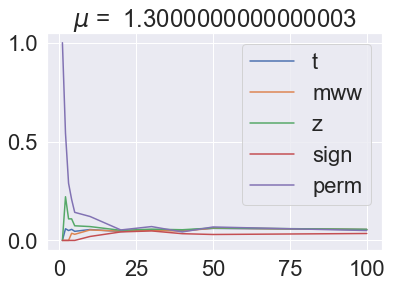

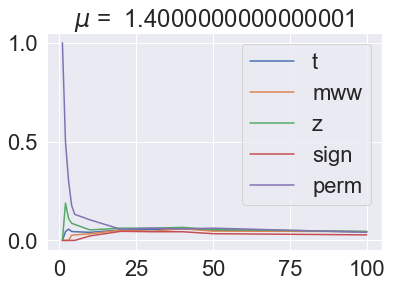

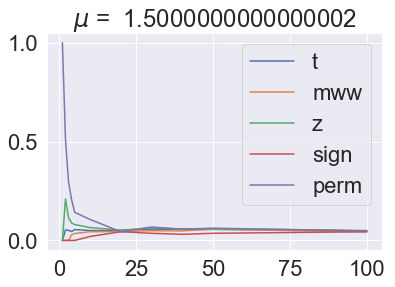

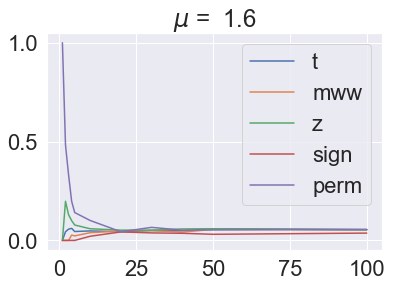

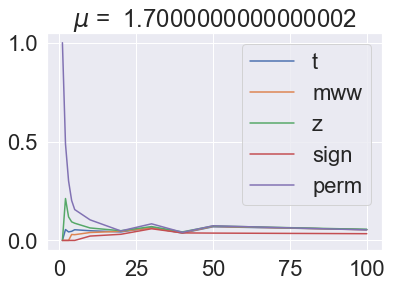

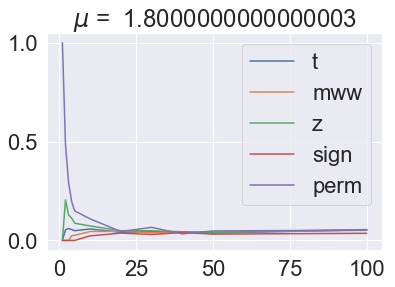

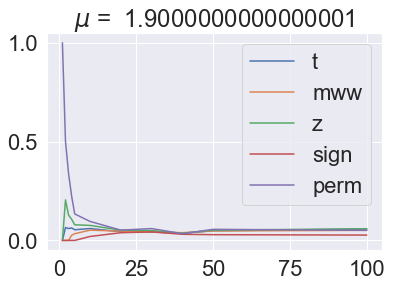

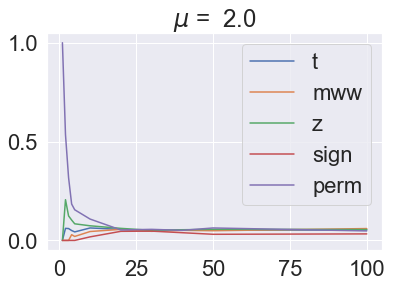

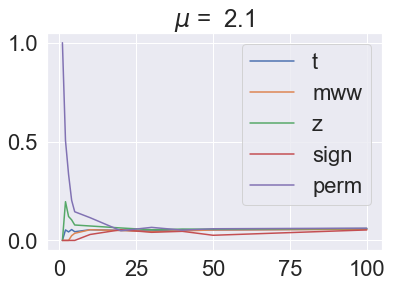

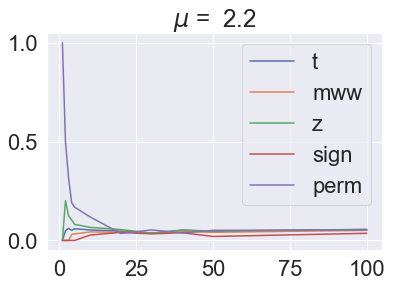

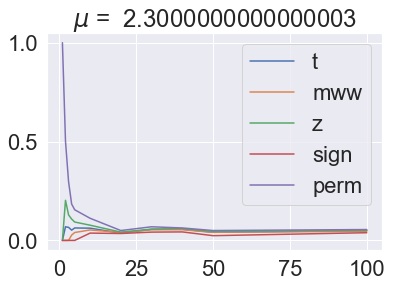

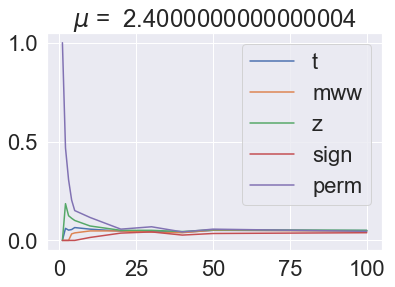

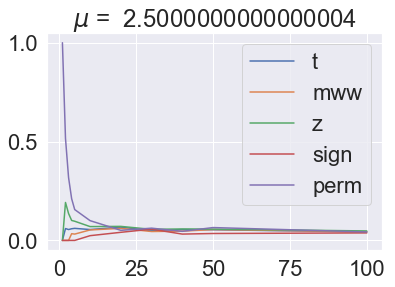

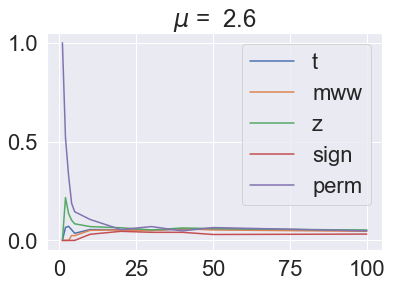

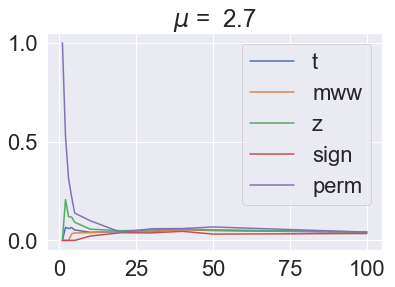

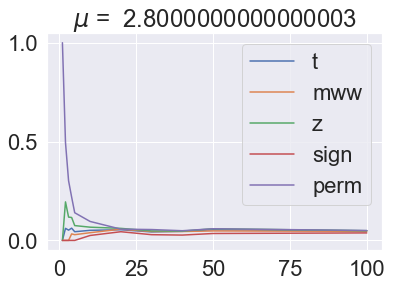

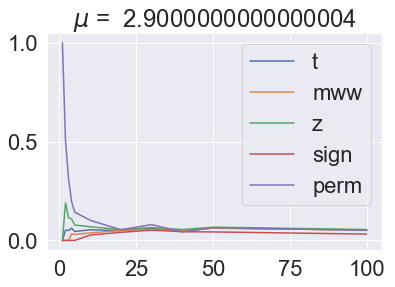

In [583]:
for i_mu in range(len(np.arange(0.1, 3, 0.1))):
    plt.figure()
    plt.title('$\mu$ =  {}'.format(mus[i_mu]))
    plt.plot(Ns, musC1[i_mu][0], label='t')
    plt.plot(Ns, musC1[i_mu][1], label='mww')
    plt.plot(Ns, musC1[i_mu][2], label='z')
    plt.plot(Ns, musC1[i_mu][3], label='sign')
    plt.plot(Ns, musC1[i_mu][4], label='perm')
    plt.legend()
    plt.show()

### 2.B. Одинаковые распределения, разные сигма.

#### 2.B.a) Эксперимент для альфа.

In [148]:
Na_t_2, Na_mww_2, Na_z_2, Na_sign_2, Na_perm_2 = [], [], [], [], []
logNa_t_2, logNa_mww_2, logNa_z_2, logNa_sign_2, logNa_perm_2 = [], [], [], [], []
Ca_t_2, Ca_mww_2, Ca_z_2, Ca_sign_2, Ca_perm_2 = [], [], [], [], []

for n in Ns:
    Np_t_2, Np_mww_2, Np_z_2, Np_sign_2, Np_perm_2 = [], [], [], [], []
    logNp_t_2, logNp_mww_2, logNp_z_2, logNp_sign_2, logNp_perm_2 = [], [], [], [], []
    Cp_t_2, Cp_mww_2, Cp_z_2, Cp_sign_2, Cp_perm_2 = [], [], [], [], []
    
    for j in range(Nr):
        ####################################
        # Norm
        X = norm.rvs(loc=0, scale=1, size=n)
        Y = norm.rvs(loc=0, scale=2, size=n)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=False)
        Np_t_2.append(p_t)
        
        # z
        X_tmp = stests.DescrStatsW(X)
        Y_tmp = stests.DescrStatsW(Y)
        z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
        Np_z_2.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        Np_mww_2.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        Np_sign_2.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        Np_perm_2.append(p_p)
        
        ######################################
        # LogNorm
        X = lognorm.rvs(s=1, loc=0, scale=1, size=n)
        Y = lognorm.rvs(s=1, loc=0, scale=2, size=n)
        # X = np.log(X)
        # Y = np.log(Y)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=False)
        logNp_t_2.append(p_t)
        
        # z
        X_tmp = stests.DescrStatsW(X)
        Y_tmp = stests.DescrStatsW(Y)
        z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
        logNp_z_2.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        logNp_mww_2.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        logNp_sign_2.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        logNp_perm_2.append(p_p)
        
        
        ######################################
        # Cauchy
        X = my_cauchy(n, 0, 1)
        Y = my_cauchy(n, 0, 2)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=False)
        Cp_t_2.append(p_t)
        
        # z 3
        X_tmp = stests.DescrStatsW(X)
        Y_tmp = stests.DescrStatsW(Y)
        z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
        Cp_z_2.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        Cp_mww_2.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        Cp_sign_2.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        Cp_perm_2.append(p_p)
    
    Na_t_2.append((Np_t_2 < (alpha * np.ones(Nr))).sum() / Nr)
    Na_mww_2.append((Np_mww_2 < (alpha * np.ones(Nr))).sum() / Nr)    
    Na_z_2.append((Np_z_2 < (alpha * np.ones(Nr))).sum() / Nr)
    Na_sign_2.append((Np_sign_2 < (alpha * np.ones(Nr))).sum() / Nr)
    Na_perm_2.append((Np_perm_2 < (alpha * np.ones(Nr))).sum() / Nr)
    
    logNa_t_2.append((logNp_t_2 < (alpha * np.ones(Nr))).sum() / Nr)
    logNa_mww_2.append((logNp_mww_2 < (alpha * np.ones(Nr))).sum() / Nr)    
    logNa_z_2.append((logNp_z_2 < (alpha * np.ones(Nr))).sum() / Nr)
    logNa_sign_2.append((logNp_sign_2 < (alpha * np.ones(Nr))).sum() / Nr)
    logNa_perm_2.append((logNp_perm_2 < (alpha * np.ones(Nr))).sum() / Nr)
    
    Ca_t_2.append((Cp_t_2 < (alpha * np.ones(Nr))).sum() / Nr)
    Ca_mww_2.append((Cp_mww_2 < (alpha * np.ones(Nr))).sum() / Nr)    
    Ca_z_2.append((Cp_z_2 < (alpha * np.ones(Nr))).sum() / Nr)
    Ca_sign_2.append((Cp_sign_2 < (alpha * np.ones(Nr))).sum() / Nr)
    Ca_perm_2.append((Cp_perm_2 < (alpha * np.ones(Nr))).sum() / Nr)
        

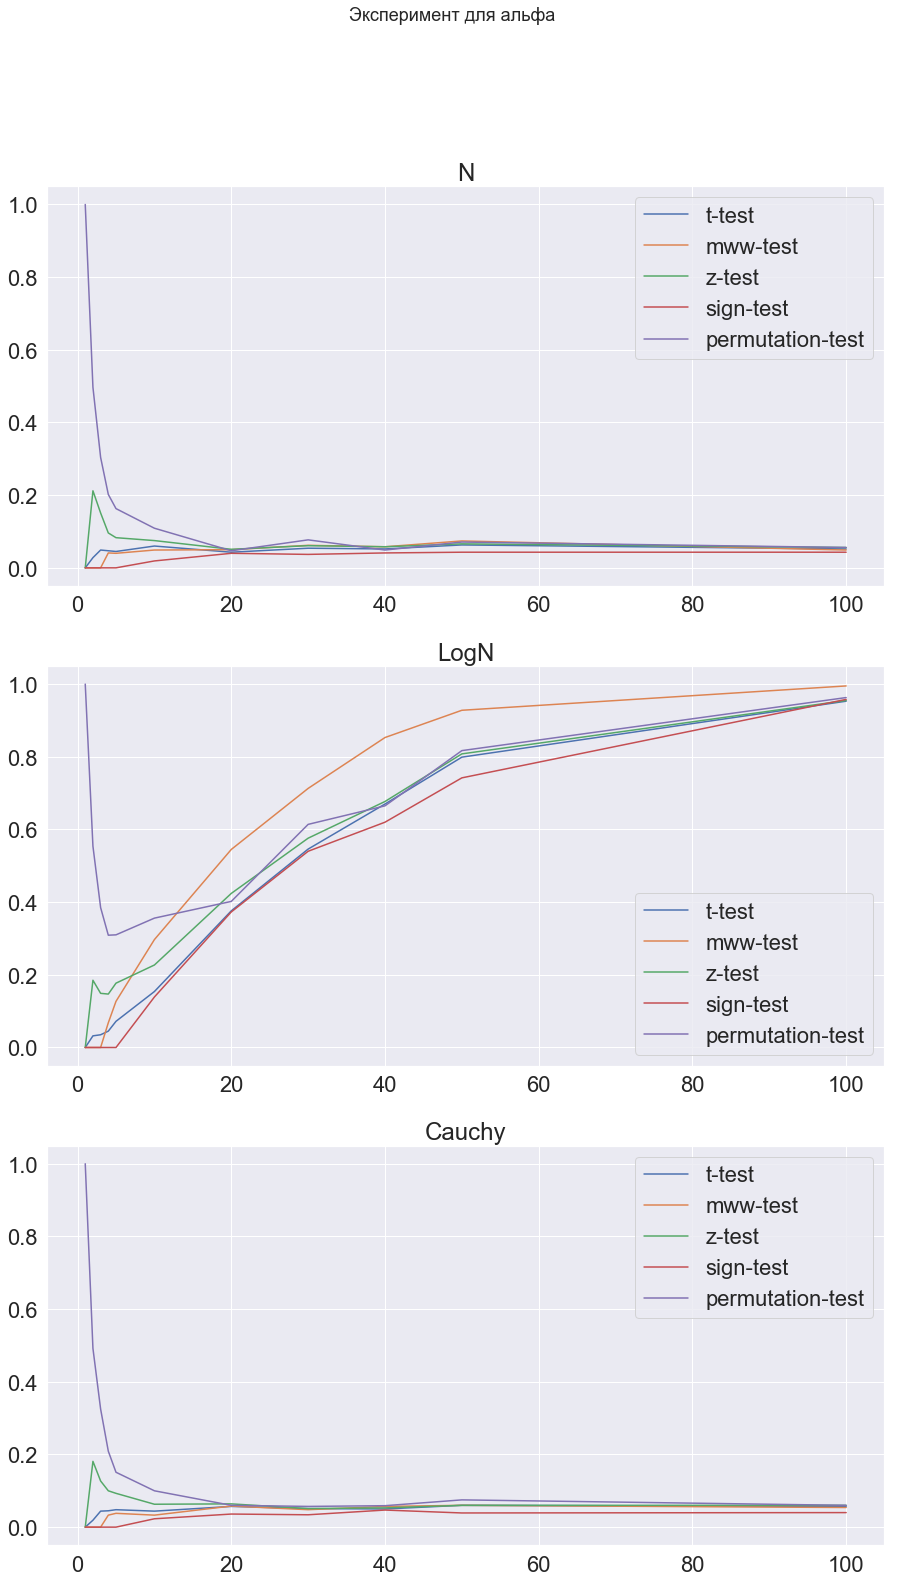

In [149]:
fig, ax = plt.subplots(3, 1, figsize=(15,25))

plt.suptitle('Эксперимент для альфа', fontsize=18)

ax[0].plot(Ns, Na_t_2, label='t-test')
ax[0].plot(Ns, Na_mww_2, label='mww-test')
ax[0].plot(Ns, Na_z_2, label='z-test')
ax[0].plot(Ns, Na_sign_2, label='sign-test')
ax[0].plot(Ns, Na_perm_2, label='permutation-test')
ax[0].legend()
ax[0].title.set_text('N')

ax[1].plot(Ns, logNa_t_2, label='t-test')
ax[1].plot(Ns, logNa_mww_2, label='mww-test')
ax[1].plot(Ns, logNa_z_2, label='z-test')
ax[1].plot(Ns, logNa_sign_2, label='sign-test')
ax[1].plot(Ns, logNa_perm_2, label='permutation-test')
ax[1].legend()
ax[1].title.set_text('LogN')

ax[2].plot(Ns, Ca_t_2, label='t-test')
ax[2].plot(Ns, Ca_mww_2, label='mww-test')
ax[2].plot(Ns, Ca_z_2, label='z-test')
ax[2].plot(Ns, Ca_sign_2, label='sign-test')
ax[2].plot(Ns, Ca_perm_2, label='permutation-test')
ax[2].legend()
ax[2].title.set_text('Cauchy')

#### 2.B.b) Эксперимент для мощности.

In [570]:
Nb_t_2, Nb_mww_2, Nb_z_2, Nb_sign_2, Nb_perm_2 = [], [], [], [], []
logNb_t_2, logNb_mww_2, logNb_z_2, logNb_sign_2, logNb_perm_2 = [], [], [], [], []
Cb_t_2, Cb_mww_2, Cb_z_2, Cb_sign_2, Cb_perm_2 = [], [], [], [], []

for n in Ns:
    for mu in np.arange(0.1, 3, 0.1):
        Np_t, Np_mww, Np_z, Np_sign, Np_perm = [], [], [], [], []
        logNp_t, logNp_mww, logNp_z, logNp_sign, logNp_perm = [], [], [], [], []
        Cp_t, Cp_mww, Cp_z, Cp_sign, Cp_perm = [], [], [], [], []
        
        for j in range(Nr):
            ####################################
            # Norm
            X = norm.rvs(loc=mu, scale=1, size=n)
            Y = norm.rvs(loc=mu, scale=2, size=n)
        
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=False)
            Np_t.append(p_t)
        
            # z
            X_tmp = stests.DescrStatsW(X)
            Y_tmp = stests.DescrStatsW(Y)
            z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
            Np_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            Np_mww.append(p_m)
        
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            Np_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            Np_perm.append(p_p)
        
            ######################################
            # LogNorm
            X = lognorm.rvs(s=1, loc=mu, scale=1, size=n)
            Y = lognorm.rvs(s=1, loc=mu, scale=2, size=n)
            # X = np.log(X)
            # Y = np.log(Y)
        
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=False)
            logNp_t.append(p_t)
            
            # z
            X_tmp = stests.DescrStatsW(X)
            Y_tmp = stests.DescrStatsW(Y)
            z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
            logNp_z.append(p_z)
        
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            logNp_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            logNp_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            logNp_perm.append(p_p)
        
        
            ######################################
            # Cauchy
            X = my_cauchy(n, mu, 1)
            Y = my_cauchy(n, mu, 2)
                
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=False)
            Cp_t.append(p_t)
            
            # z 3
            X_tmp = stests.DescrStatsW(X)
            Y_tmp = stests.DescrStatsW(Y)
            z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
            Cp_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            Cp_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            Cp_sign.append(p_s)
        
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            Cp_perm.append(p_p)
    
    
        Nb_t_2.append((Np_t < (alpha * np.ones(Nr))).sum() / Nr)
        Nb_mww_2.append((Np_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        Nb_z_2.append((Np_z < (alpha * np.ones(Nr))).sum() / Nr)
        Nb_sign_2.append((Np_sign < (alpha * np.ones(Nr))).sum() / Nr)
        Nb_perm_2.append((Np_perm < (alpha * np.ones(Nr))).sum() / Nr)
        
        logNb_t_2.append((logNp_t < (alpha * np.ones(Nr))).sum() / Nr)
        logNb_mww_2.append((logNp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        logNb_z_2.append((logNp_z < (alpha * np.ones(Nr))).sum() / Nr)
        logNb_sign_2.append((logNp_sign < (alpha * np.ones(Nr))).sum() / Nr)
        logNb_perm_2.append((logNp_perm < (alpha * np.ones(Nr))).sum() / Nr)
        
        Cb_t_2.append((Cp_t < (alpha * np.ones(Nr))).sum() / Nr)
        Cb_mww_2.append((Cp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        Cb_z_2.append((Cp_z < (alpha * np.ones(Nr))).sum() / Nr)
        Cb_sign_2.append((Cp_sign < (alpha * np.ones(Nr))).sum() / Nr)
        Cb_perm_2.append((Cp_perm < (alpha * np.ones(Nr))).sum() / Nr)

In [571]:
musN2 = [[[] for j in range(5)] for i in range(29)]
muslogN2 = [[[] for j in range(5)] for i in range(29)]
musC2 = [[[] for j in range(5)] for i in range(29)]

In [573]:
for i_mu in range(len(np.arange(0.1, 3, 0.1))):
    for j in np.arange(i_mu, 319, 29):
        musN2[i_mu][0].append(Nb_t_2[j])
        musN2[i_mu][1].append(Nb_mww_2[j])
        musN2[i_mu][2].append(Nb_z_2[j])
        musN2[i_mu][3].append(Nb_sign_2[j])
        musN2[i_mu][4].append(Nb_perm_2[j])
        
        muslogN2[i_mu][0].append(logNb_t_2[j])
        muslogN2[i_mu][1].append(logNb_mww_2[j])
        muslogN2[i_mu][2].append(logNb_z_2[j])
        muslogN2[i_mu][3].append(logNb_sign_2[j])
        muslogN2[i_mu][4].append(logNb_perm_2[j])
        
        musC2[i_mu][0].append(Cb_t_2[j])
        musC2[i_mu][1].append(Cb_mww_2[j])
        musC2[i_mu][2].append(Cb_z_2[j])
        musC2[i_mu][3].append(Cb_sign_2[j])
        musC2[i_mu][4].append(Cb_perm_2[j])

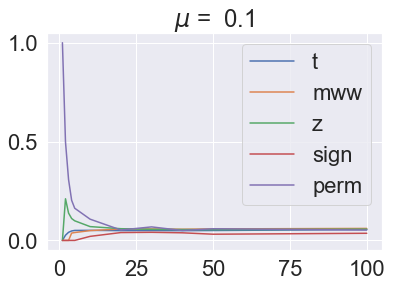

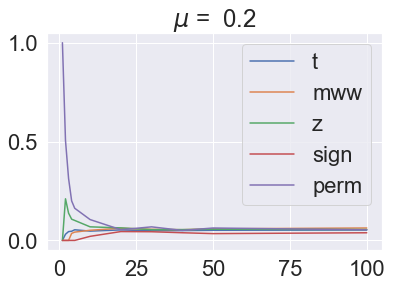

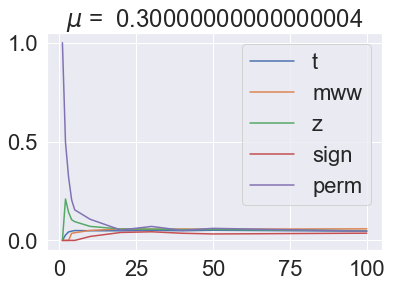

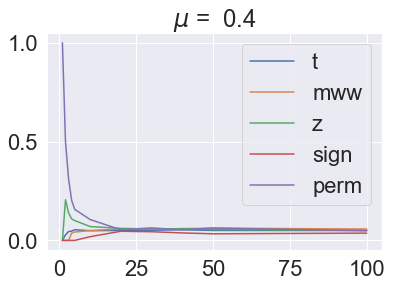

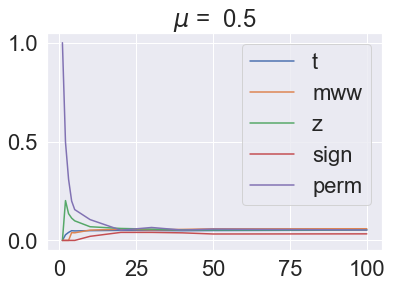

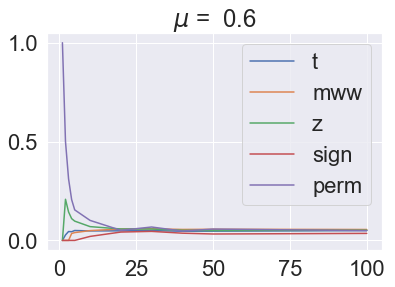

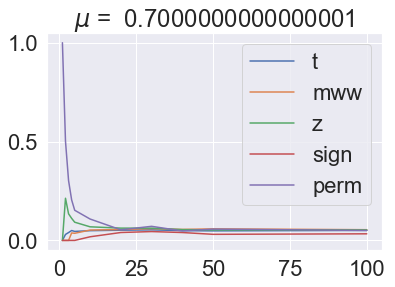

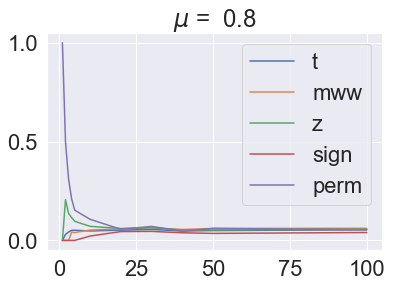

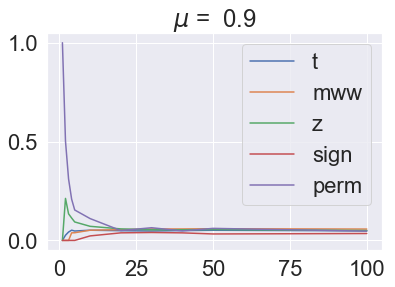

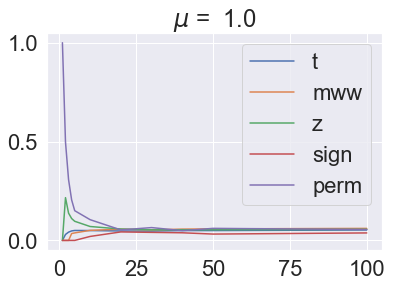

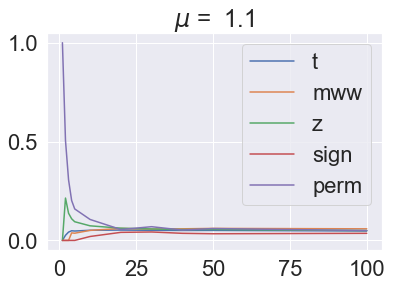

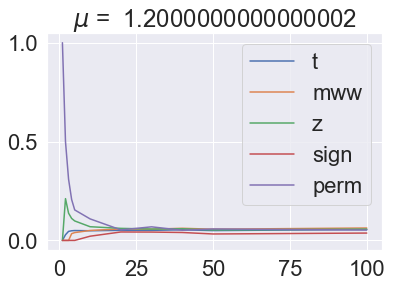

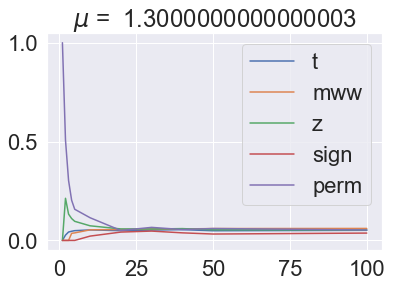

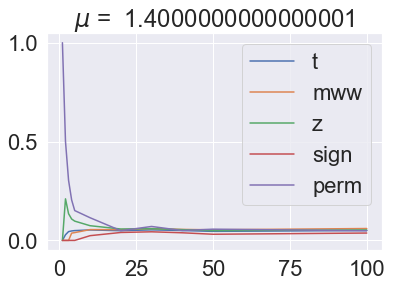

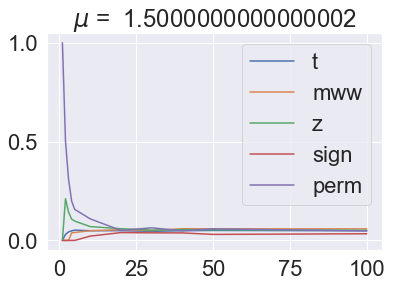

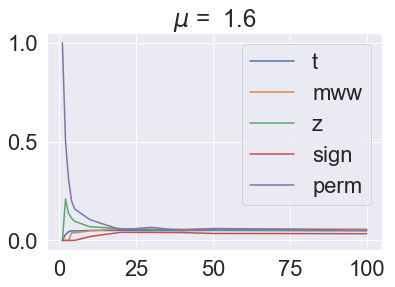

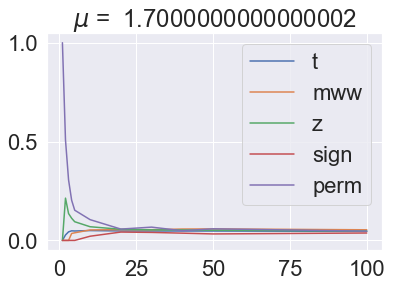

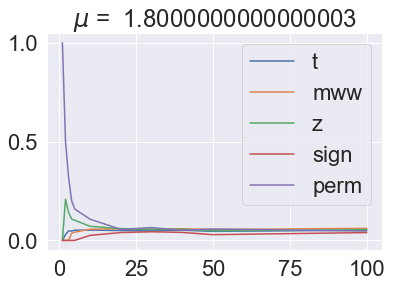

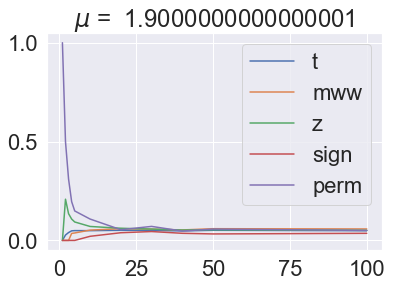

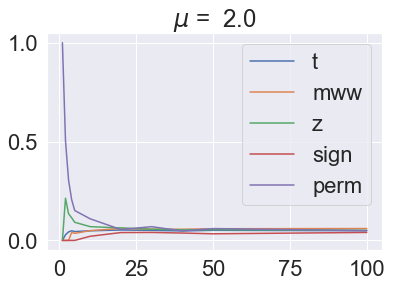

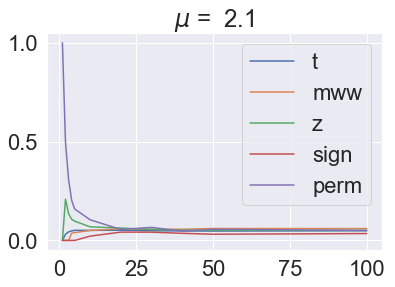

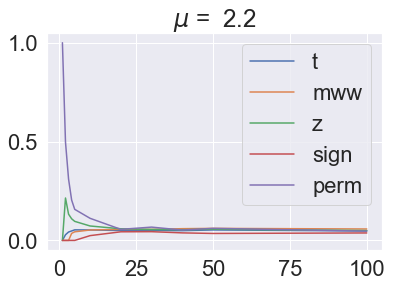

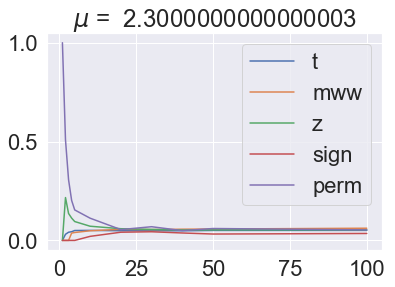

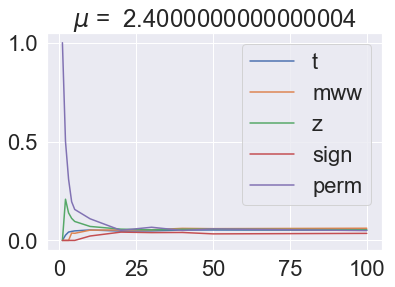

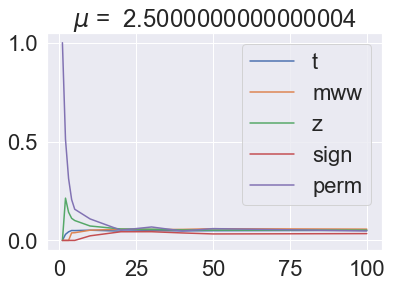

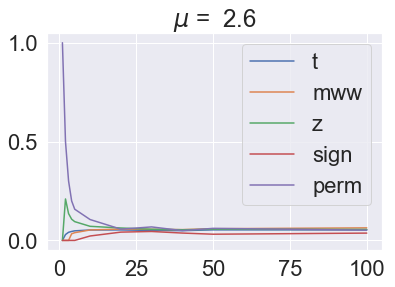

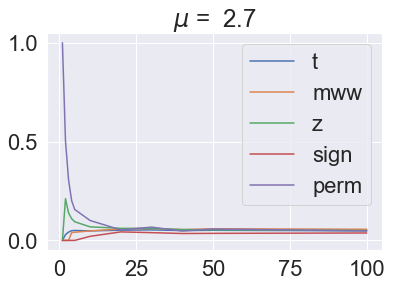

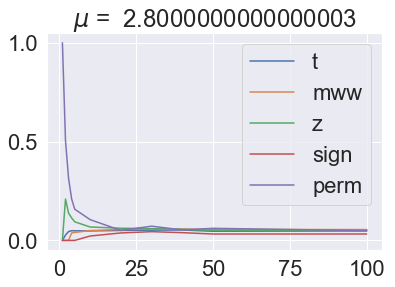

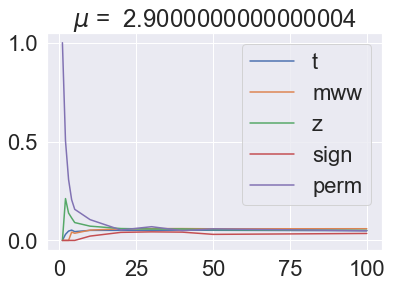

In [579]:
for i_mu in range(len(np.arange(0.1, 3, 0.1))):
    plt.figure()
    plt.title('$\mu$ =  {}'.format(mus[i_mu]))
    plt.plot(Ns, musN2[i_mu][0], label='t')
    plt.plot(Ns, musN2[i_mu][1], label='mww')
    plt.plot(Ns, musN2[i_mu][2], label='z')
    plt.plot(Ns, musN2[i_mu][3], label='sign')
    plt.plot(Ns, musN2[i_mu][4], label='perm')
    plt.legend()
    plt.show()

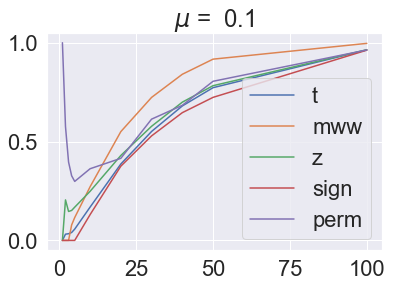

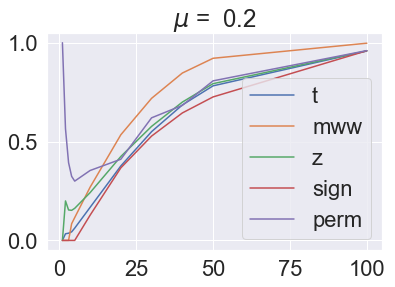

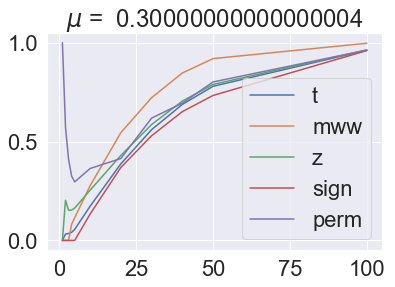

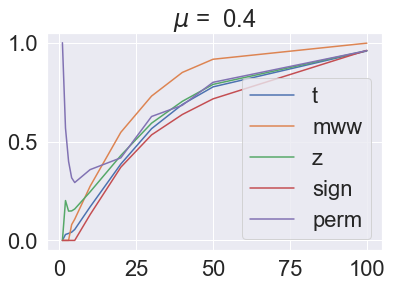

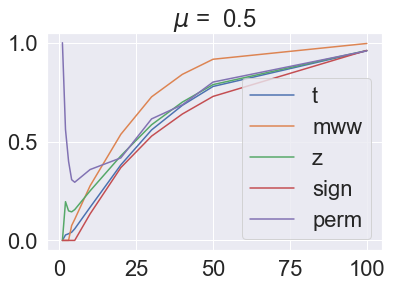

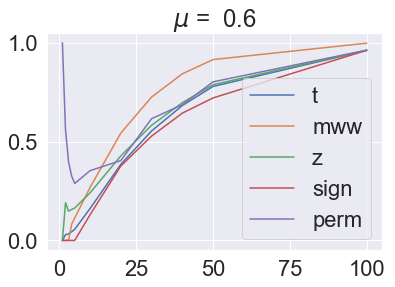

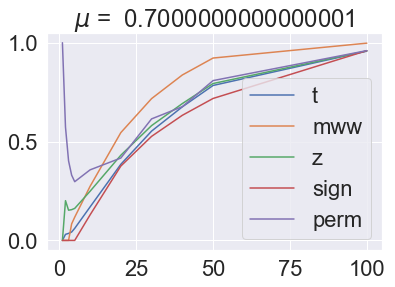

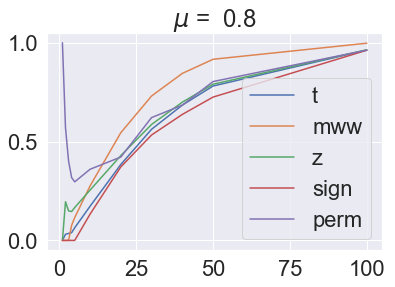

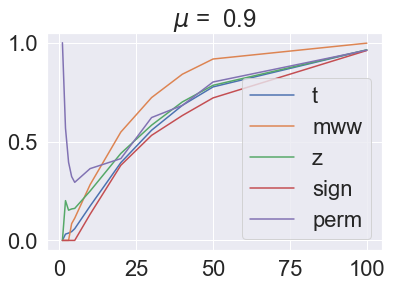

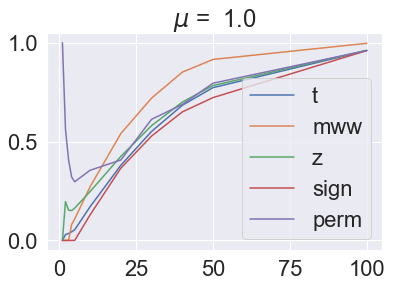

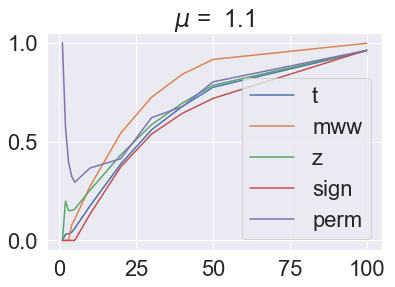

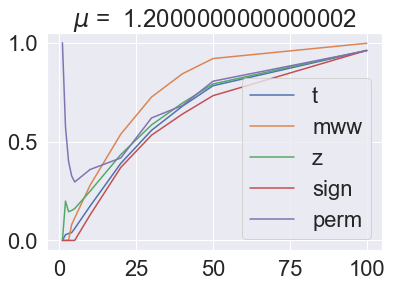

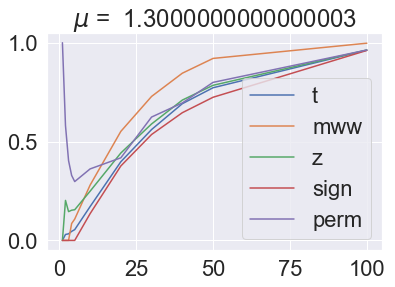

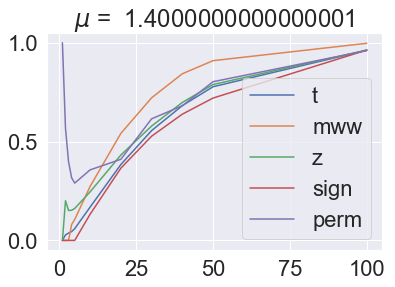

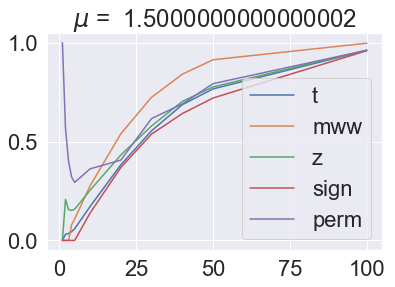

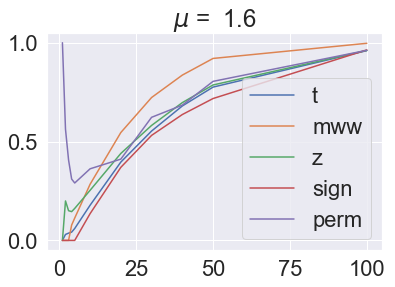

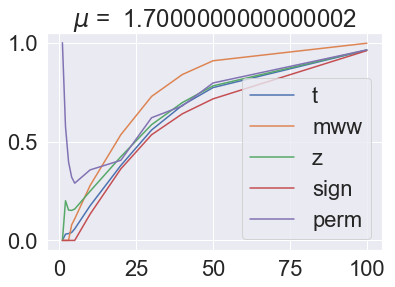

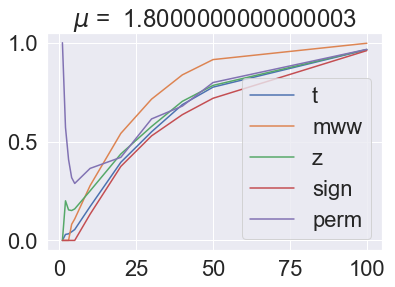

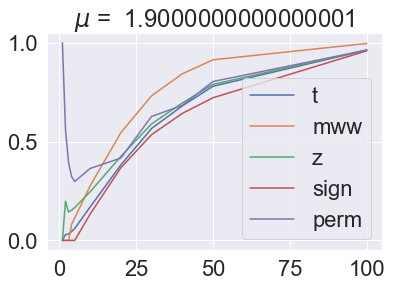

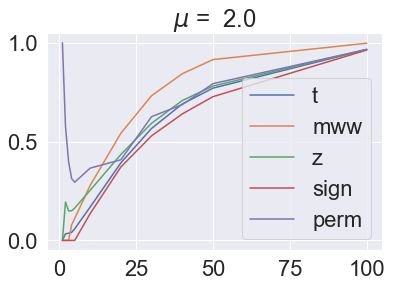

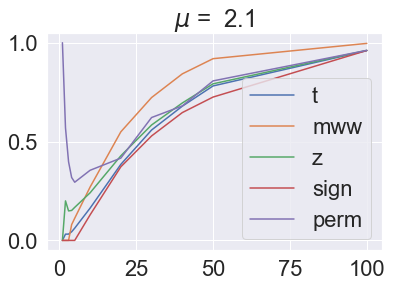

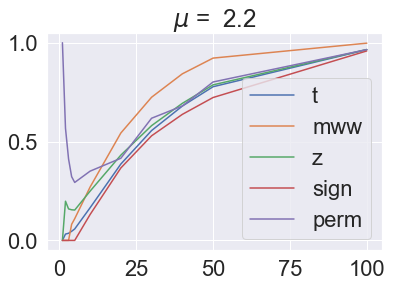

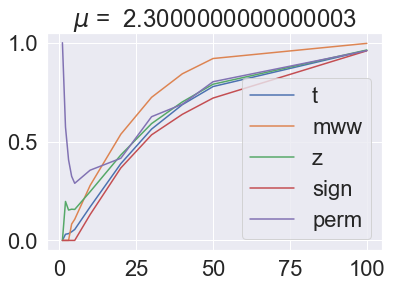

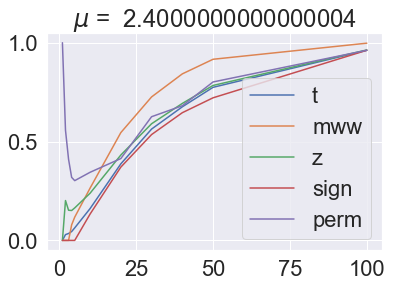

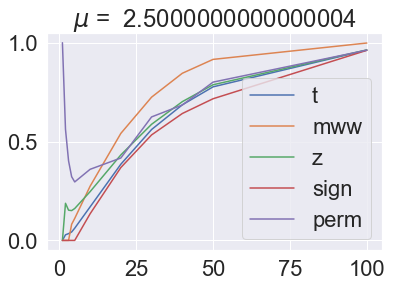

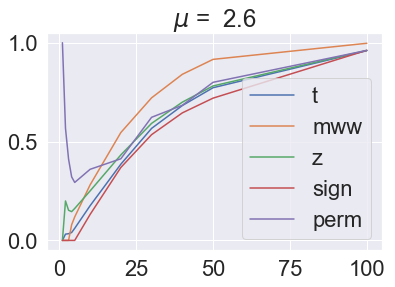

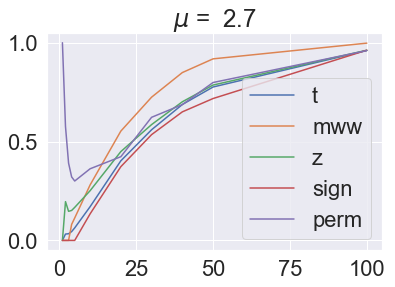

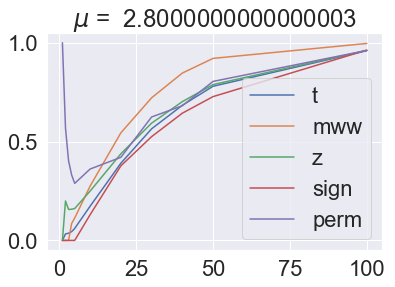

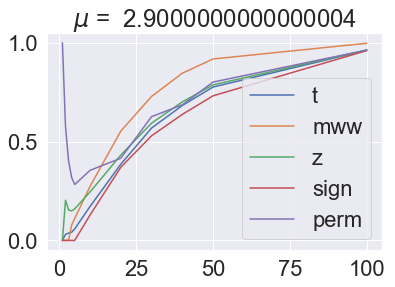

In [578]:
for i_mu in range(len(np.arange(0.1, 3, 0.1))):
    plt.figure()
    plt.title('$\mu$ =  {}'.format(mus[i_mu]))
    plt.plot(Ns, muslogN2[i_mu][0], label='t')
    plt.plot(Ns, muslogN2[i_mu][1], label='mww')
    plt.plot(Ns, muslogN2[i_mu][2], label='z')
    plt.plot(Ns, muslogN2[i_mu][3], label='sign')
    plt.plot(Ns, muslogN2[i_mu][4], label='perm')
    plt.legend()
    plt.show()

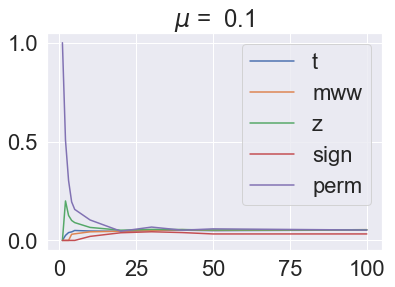

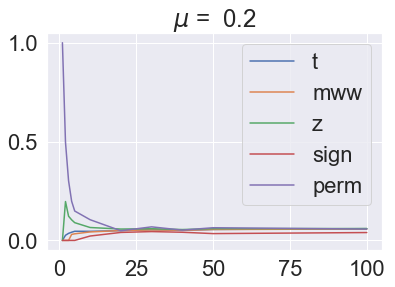

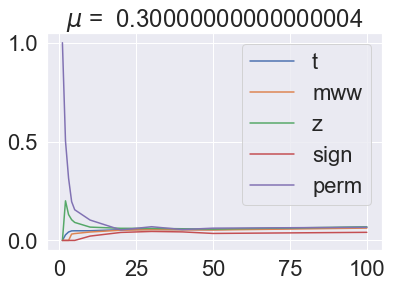

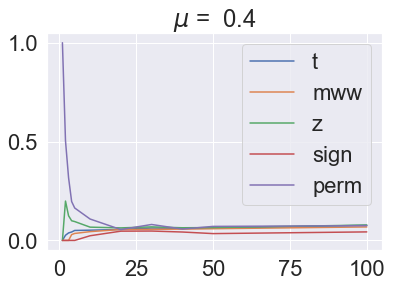

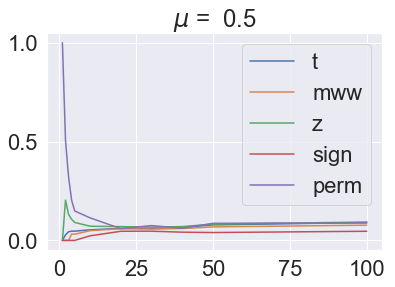

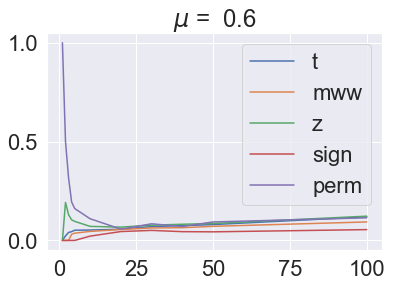

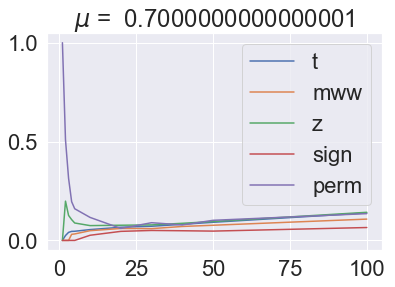

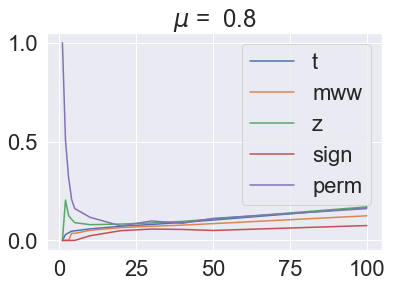

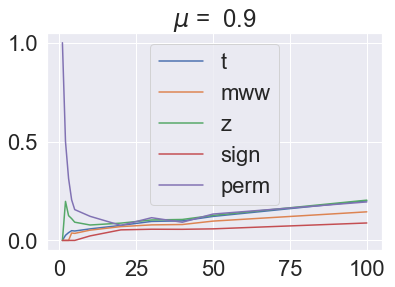

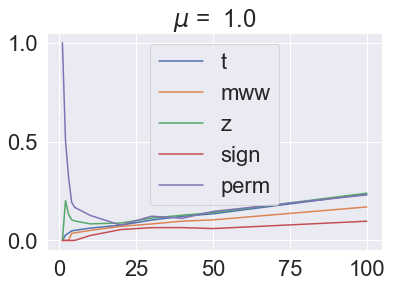

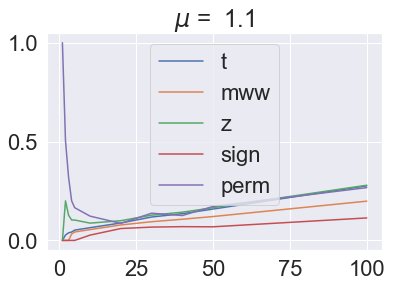

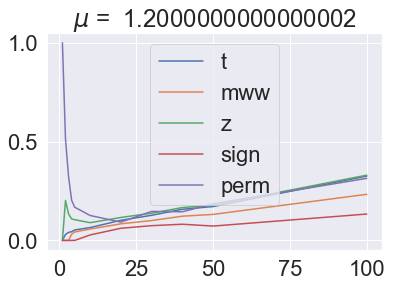

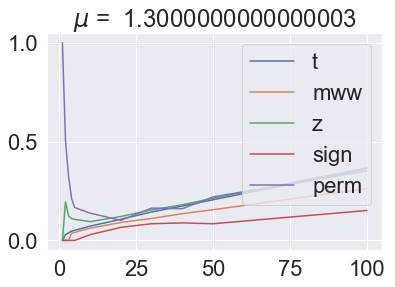

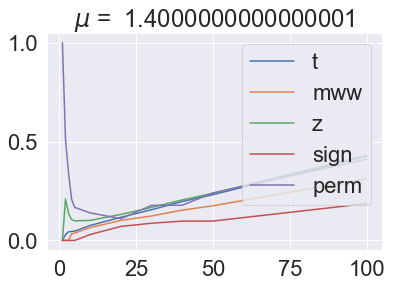

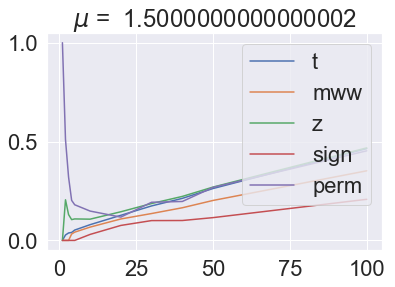

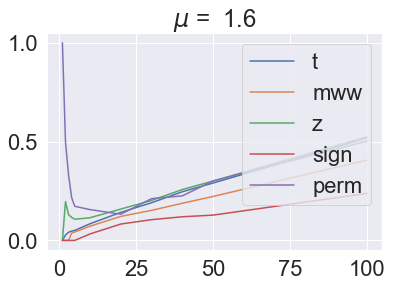

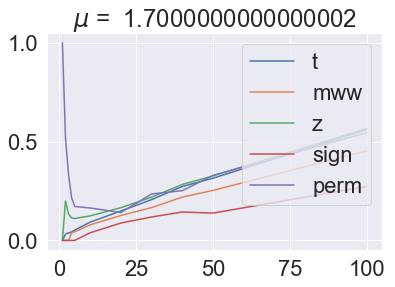

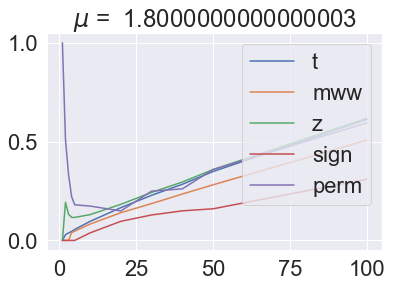

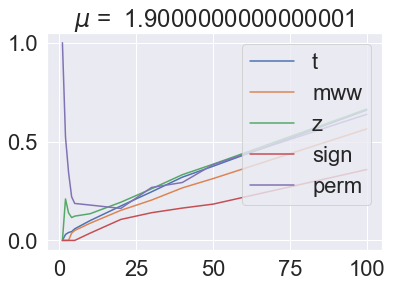

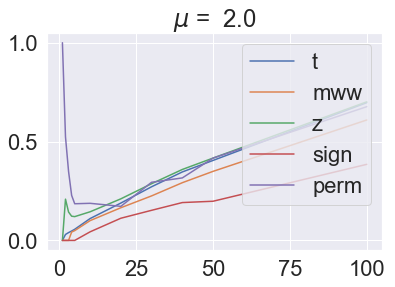

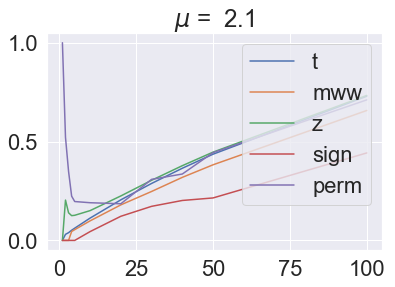

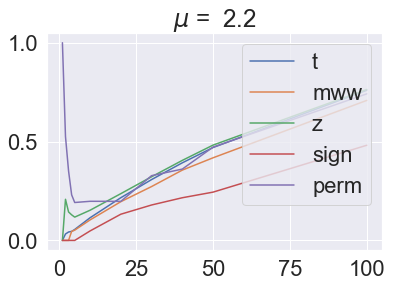

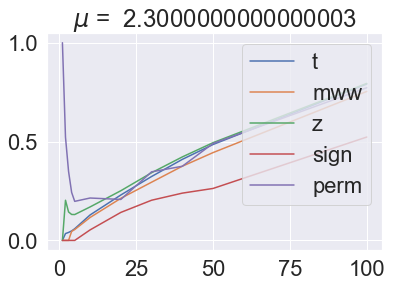

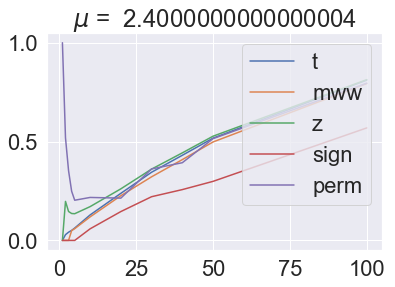

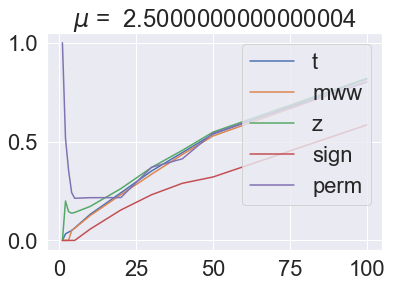

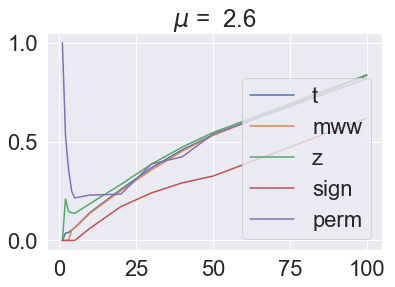

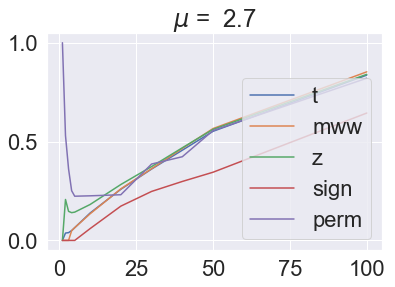

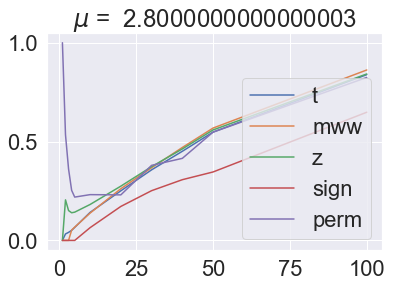

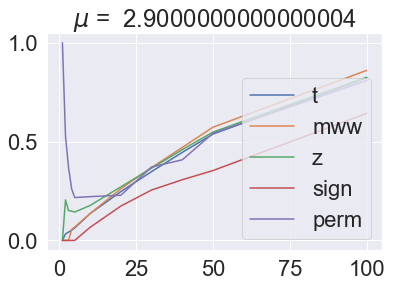

In [580]:
for i_mu in range(len(np.arange(0.1, 3, 0.1))):
    plt.figure()
    plt.title('$\mu$ =  {}'.format(mus[i_mu]))
    plt.plot(Ns, musC2[i_mu][0], label='t')
    plt.plot(Ns, musC2[i_mu][1], label='mww')
    plt.plot(Ns, musC2[i_mu][2], label='z')
    plt.plot(Ns, musC2[i_mu][3], label='sign')
    plt.plot(Ns, musC2[i_mu][4], label='perm')
    plt.legend()
    plt.show()

### 2.С. Разные распределения, одинаковые сигма.

#### 2.C.a) Эксперимент для альфа.

In [150]:
NLa_t, NLa_mww, NLa_z, NLa_sign, NLa_perm = [], [], [], [], []
NCa_t, NCa_mww, NCa_z, NCa_sign, NCa_perm = [], [], [], [], []
LCa_t, LCa_mww, LCa_z, LCa_sign, LCa_perm = [], [], [], [], []

for n in Ns:
    NLp_t, NLp_mww, NLp_z, NLp_sign, NLp_perm = [], [], [], [], []
    NCp_t, NCp_mww, NCp_z, NCp_sign, NCp_perm = [], [], [], [], []
    LCp_t, LCp_mww, LCp_z, LCp_sign, LCp_perm = [], [], [], [], []
    
    for j in range(Nr):
        ####################################
        # Norm & LogN
        X = norm.rvs(loc=0, scale=1, size=n)
        Y = lognorm.rvs(s=1, loc=0, scale=1, size=n)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=True)
        NLp_t.append(p_t)
        
        # z
        z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
        NLp_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        NLp_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        NLp_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        NLp_perm.append(p_p)
        
        ######################################
        # Norm & Cauchy
        X = norm.rvs(loc=0, scale=1, size=n)
        Y = my_cauchy(n, 0, 1)
        # X = np.log(X)
        # Y = np.log(Y)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=True)
        NCp_t.append(p_t)
        
        # z
        z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
        NCp_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        NCp_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        NCp_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        NCp_perm.append(p_p)
        
        
        ######################################
        # LogN & Cauchy
        X = lognorm.rvs(s=1, loc=0, scale=1, size=n)
        Y = my_cauchy(n, 0, 1)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=True)
        LCp_t.append(p_t)
        
        # z 3
        z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
        LCp_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        LCp_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        LCp_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        LCp_perm.append(p_p)
    
    NLa_t.append((NLp_t < (alpha * np.ones(Nr))).sum() / Nr)
    NLa_mww.append((NLp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    NLa_z.append((NLp_z < (alpha * np.ones(Nr))).sum() / Nr)
    NLa_sign.append((NLp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    NLa_perm.append((NLp_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    NCa_t.append((NCp_t < (alpha * np.ones(Nr))).sum() / Nr)
    NCa_mww.append((NCp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    NCa_z.append((NCp_z < (alpha * np.ones(Nr))).sum() / Nr)
    NCa_sign.append((NCp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    NCa_perm.append((NCp_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    LCa_t.append((LCp_t < (alpha * np.ones(Nr))).sum() / Nr)
    LCa_mww.append((LCp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    LCa_z.append((LCp_z < (alpha * np.ones(Nr))).sum() / Nr)
    LCa_sign.append((LCp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    LCa_perm.append((LCp_perm < (alpha * np.ones(Nr))).sum() / Nr)

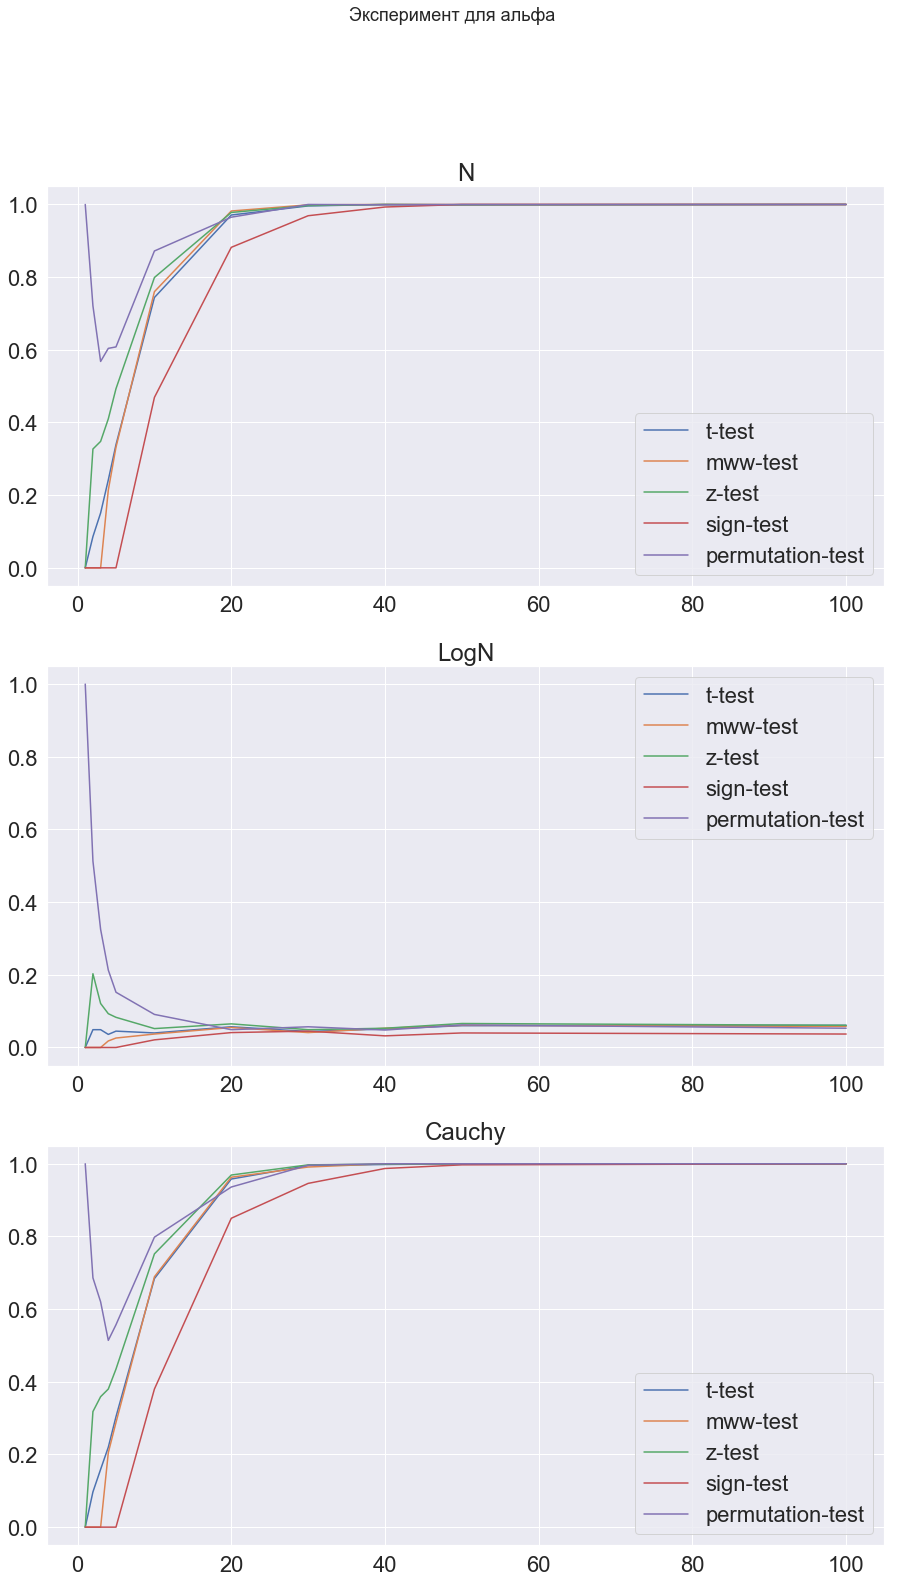

In [151]:
fig, ax = plt.subplots(3, 1, figsize=(15,25))

plt.suptitle('Эксперимент для альфа', fontsize=18)

ax[0].plot(Ns, NLa_t, label='t-test')
ax[0].plot(Ns, NLa_mww, label='mww-test')
ax[0].plot(Ns, NLa_z, label='z-test')
ax[0].plot(Ns, NLa_sign, label='sign-test')
ax[0].plot(Ns, NLa_perm, label='permutation-test')
ax[0].legend()
ax[0].title.set_text('N')

ax[1].plot(Ns, NCa_t, label='t-test')
ax[1].plot(Ns, NCa_mww, label='mww-test')
ax[1].plot(Ns, NCa_z, label='z-test')
ax[1].plot(Ns, NCa_sign, label='sign-test')
ax[1].plot(Ns, NCa_perm, label='permutation-test')
ax[1].legend()
ax[1].title.set_text('LogN')

ax[2].plot(Ns, LCa_t, label='t-test')
ax[2].plot(Ns, LCa_mww, label='mww-test')
ax[2].plot(Ns, LCa_z, label='z-test')
ax[2].plot(Ns, LCa_sign, label='sign-test')
ax[2].plot(Ns, LCa_perm, label='permutation-test')
ax[2].legend()
ax[2].title.set_text('Cauchy')

#### 2.C.b) Эксперимент для мощности.

In [584]:
NLb_t, NLb_mww, NLb_z, NLb_sign, NLb_perm = [], [], [], [], []
NCb_t, NCb_mww, NCb_z, NCb_sign, NCb_perm = [], [], [], [], []
LCb_t, LCb_mww, LCb_z, LCb_sign, LCb_perm = [], [], [], [], []

for n in Ns:
    for mu in np.arange(0.1, 3, 0.1):
        NLp_t, NLp_mww, NLp_z, NLp_sign, NLp_perm = [], [], [], [], []
        NCp_t, NCp_mww, NCp_z, NCp_sign, NCp_perm = [], [], [], [], []
        LCp_t, LCp_mww, LCp_z, LCp_sign, LCp_perm = [], [], [], [], []
    
        for j in range(Nr):
            ####################################
            # Norm & LogN
            X = norm.rvs(loc=mu, scale=1, size=n)
            Y = lognorm.rvs(s=1, loc=mu, scale=1, size=n)
        
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=True)
            NLp_t.append(p_t)
            
            # z
            z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
            NLp_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            NLp_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            NLp_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            NLp_perm.append(p_p)
            
            ######################################
            # Norm & Cauchy
            X = norm.rvs(loc=mu, scale=1, size=n)
            Y = my_cauchy(n, mu, 1)
            # X = np.log(X)
            # Y = np.log(Y)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=True)
            NCp_t.append(p_t)
            
            # z
            z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
            NCp_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            NCp_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            NCp_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            NCp_perm.append(p_p)
            
            
            ######################################
            # LogN & Cauchy
            X = lognorm.rvs(s=1, loc=mu, scale=1, size=n)
            Y = my_cauchy(n, mu, 1)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=True)
            LCp_t.append(p_t)
            
            # z 3
            z, p_z = stests.ztest(X, Y, value=0,alternative='two-sided')
            LCp_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            LCp_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            LCp_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            LCp_perm.append(p_p)
    
    NLb_t.append((NLp_t < (alpha * np.ones(Nr))).sum() / Nr)
    NLb_mww.append((NLp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    NLb_z.append((NLp_z < (alpha * np.ones(Nr))).sum() / Nr)
    NLb_sign.append((NLp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    NLb_perm.append((NLp_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    NCb_t.append((NCp_t < (alpha * np.ones(Nr))).sum() / Nr)
    NCb_mww.append((NCp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    NCb_z.append((NCp_z < (alpha * np.ones(Nr))).sum() / Nr)
    NCb_sign.append((NCp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    NCb_perm.append((NCp_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    LCb_t.append((LCp_t < (alpha * np.ones(Nr))).sum() / Nr)
    LCb_mww.append((LCp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    LCb_z.append((LCp_z < (alpha * np.ones(Nr))).sum() / Nr)
    LCb_sign.append((LCp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    LCb_perm.append((LCp_perm < (alpha * np.ones(Nr))).sum() / Nr)
    

In [585]:
musNL = [[[] for j in range(5)] for i in range(29)]
musNC = [[[] for j in range(5)] for i in range(29)]
musLC = [[[] for j in range(5)] for i in range(29)]

Ну в общем я случайно поставила табуляцию и результы посчитались только для n = Ns[-1]. Но это считалось более 5 часов..... 

In [586]:
for i_mu in range(len(np.arange(0.1, 3, 0.1))):
    for j in np.arange(i_mu, 319, 29):
        musNL[i_mu][0].append(NLb_t[j])
        musNL[i_mu][1].append(NLb_mww[j])
        musNL[i_mu][2].append(NLb_z[j])
        musNL[i_mu][3].append(NLb_sign[j])
        musNL[i_mu][4].append(NLb_perm[j])
        
        musNC[i_mu][0].append(NCb_t[j])
        musNC[i_mu][1].append(NCb_mww[j])
        musNC[i_mu][2].append(NCb_z[j])
        musNC[i_mu][3].append(NCb_sign[j])
        musNC[i_mu][4].append(NCb_perm[j])
        
        musLC[i_mu][0].append(LCb_t[j])
        musLC[i_mu][1].append(LCb_mww[j])
        musLC[i_mu][2].append(LCb_z[j])
        musLC[i_mu][3].append(LCb_sign[j])
        musLC[i_mu][4].append(LCb_perm[j])

IndexError: list index out of range

### 2.D. Разные распределения, разные сигма.

#### 2.D.a) Эксперимент для альфа.

In [154]:
NL2a_t, NL2a_mww, NL2a_z, NL2a_sign, NL2a_perm = [], [], [], [], []
NC2a_t, NC2a_mww, NC2a_z, NC2a_sign, NC2a_perm = [], [], [], [], []
LC2a_t, LC2a_mww, LC2a_z, LC2a_sign, LC2a_perm = [], [], [], [], []
LNa_t, LNa_mww, LNa_z, LNa_sign, LNa_perm = [], [], [], [], []
CNa_t, CNa_mww, CNa_z, CNa_sign, CNa_perm = [], [], [], [], []
CLa_t, CLa_mww, CLa_z, CLa_sign, CLa_perm = [], [], [], [], []

for n in Ns:
    NL2p_t, NL2p_mww, NL2p_z, NL2p_sign, NL2p_perm = [], [], [], [], []
    NC2p_t, NC2p_mww, NC2p_z, NC2p_sign, NC2p_perm = [], [], [], [], []
    LC2p_t, LC2p_mww, LC2p_z, LC2p_sign, LC2p_perm = [], [], [], [], []
    LNp_t, LNp_mww, LNp_z, LNp_sign, LNp_perm = [], [], [], [], []
    CNp_t, CNp_mww, CNp_z, CNp_sign, CNp_perm = [], [], [], [], []
    CLp_t, CLp_mww, CLp_z, CLp_sign, CLp_perm = [], [], [], [], []
    
    for j in range(Nr):
        ####################################
        # Norm & LogN
        X = norm.rvs(loc=0, scale=1, size=n)
        Y = lognorm.rvs(s=1, loc=0, scale=2, size=n)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=False)
        NL2p_t.append(p_t)
        
        # z
        X_tmp = stests.DescrStatsW(X)
        Y_tmp = stests.DescrStatsW(Y)
        z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
        NL2p_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        NL2p_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        NL2p_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        NL2p_perm.append(p_p)
        
        ####################################
        # Norm & Cauchy
        X = norm.rvs(loc=0, scale=1, size=n)
        Y = my_cauchy(n, 0, 2)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=False)
        NC2p_t.append(p_t)
        
        # z
        X_tmp = stests.DescrStatsW(X)
        Y_tmp = stests.DescrStatsW(Y)
        z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
        NC2p_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        NC2p_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        NC2p_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        NC2p_perm.append(p_p)
        
        ####################################
        # LogN & Norm
        X = norm.rvs(loc=0, scale=2, size=n)
        Y = lognorm.rvs(s=1, loc=0, scale=1, size=n)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=False)
        LNp_t.append(p_t)
        
        # z
        X_tmp = stests.DescrStatsW(X)
        Y_tmp = stests.DescrStatsW(Y)
        z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
        LNp_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        LNp_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        LNp_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        LNp_perm.append(p_p)
        
        ######################################
        # LogN & Cauchy
        X = lognorm.rvs(s=1, loc=0, scale=1, size=n)
        Y = my_cauchy(n, 0, 2)
        # X = np.log(X)
        # Y = np.log(Y)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=False)
        LC2p_t.append(p_t)
        
        # z
        X_tmp = stests.DescrStatsW(X)
        Y_tmp = stests.DescrStatsW(Y)
        z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
        LC2p_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        LC2p_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        LC2p_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        LC2p_perm.append(p_p)
        
        
        ####################################
        # Cauchy & Norm
        X = norm.rvs(loc=0, scale=2, size=n)
        Y = my_cauchy(n, 0, 1)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=False)
        CNp_t.append(p_t)
        
        # z
        X_tmp = stests.DescrStatsW(X)
        Y_tmp = stests.DescrStatsW(Y)
        z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
        CNp_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        CNp_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        CNp_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        CNp_perm.append(p_p)
        
        ######################################
        # Cauchy & LogN
        X = lognorm.rvs(s=1, loc=0, scale=2, size=n)
        Y = my_cauchy(n, 0, 1)
        
        # t
        t, p_t = stats.ttest_ind(X, Y, equal_var=False)
        CLp_t.append(p_t)
        
        # z
        X_tmp = stests.DescrStatsW(X)
        Y_tmp = stests.DescrStatsW(Y)
        z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
        CLp_z.append(p_z)
        
        # mww
        m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
        CLp_mww.append(p_m)
        
        # sign
        Q = X - Y
        s, p_s = sign_test(Q)
        CLp_sign.append(p_s)
        
        # perm
        p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
        CLp_perm.append(p_p)
    
    NL2a_t.append((NL2p_t < (alpha * np.ones(Nr))).sum() / Nr)
    NL2a_mww.append((NL2p_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    NL2a_z.append((NL2p_z < (alpha * np.ones(Nr))).sum() / Nr)
    NL2a_sign.append((NL2p_sign < (alpha * np.ones(Nr))).sum() / Nr)
    NL2a_perm.append((NL2p_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    NC2a_t.append((NC2p_t < (alpha * np.ones(Nr))).sum() / Nr)
    NC2a_mww.append((NC2p_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    NC2a_z.append((NC2p_z < (alpha * np.ones(Nr))).sum() / Nr)
    NC2a_sign.append((NC2p_sign < (alpha * np.ones(Nr))).sum() / Nr)
    NC2a_perm.append((NC2p_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    LC2a_t.append((LC2p_t < (alpha * np.ones(Nr))).sum() / Nr)
    LC2a_mww.append((LC2p_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    LC2a_z.append((LC2p_z < (alpha * np.ones(Nr))).sum() / Nr)
    LC2a_sign.append((LC2p_sign < (alpha * np.ones(Nr))).sum() / Nr)
    LC2a_perm.append((LC2p_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    LNa_t.append((LNp_t < (alpha * np.ones(Nr))).sum() / Nr)
    LNa_mww.append((LNp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    LNa_z.append((LNp_z < (alpha * np.ones(Nr))).sum() / Nr)
    LNa_sign.append((LNp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    LNa_perm.append((LNp_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    CNa_t.append((CNp_t < (alpha * np.ones(Nr))).sum() / Nr)
    CNa_mww.append((CNp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    CNa_z.append((CNp_z < (alpha * np.ones(Nr))).sum() / Nr)
    CNa_sign.append((CNp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    CNa_perm.append((CNp_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
    CLa_t.append((CLp_t < (alpha * np.ones(Nr))).sum() / Nr)
    CLa_mww.append((CLp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
    CLa_z.append((CLp_z < (alpha * np.ones(Nr))).sum() / Nr)
    CLa_sign.append((CLp_sign < (alpha * np.ones(Nr))).sum() / Nr)
    CLa_perm.append((CLp_perm < (alpha * np.ones(Nr))).sum() / Nr)

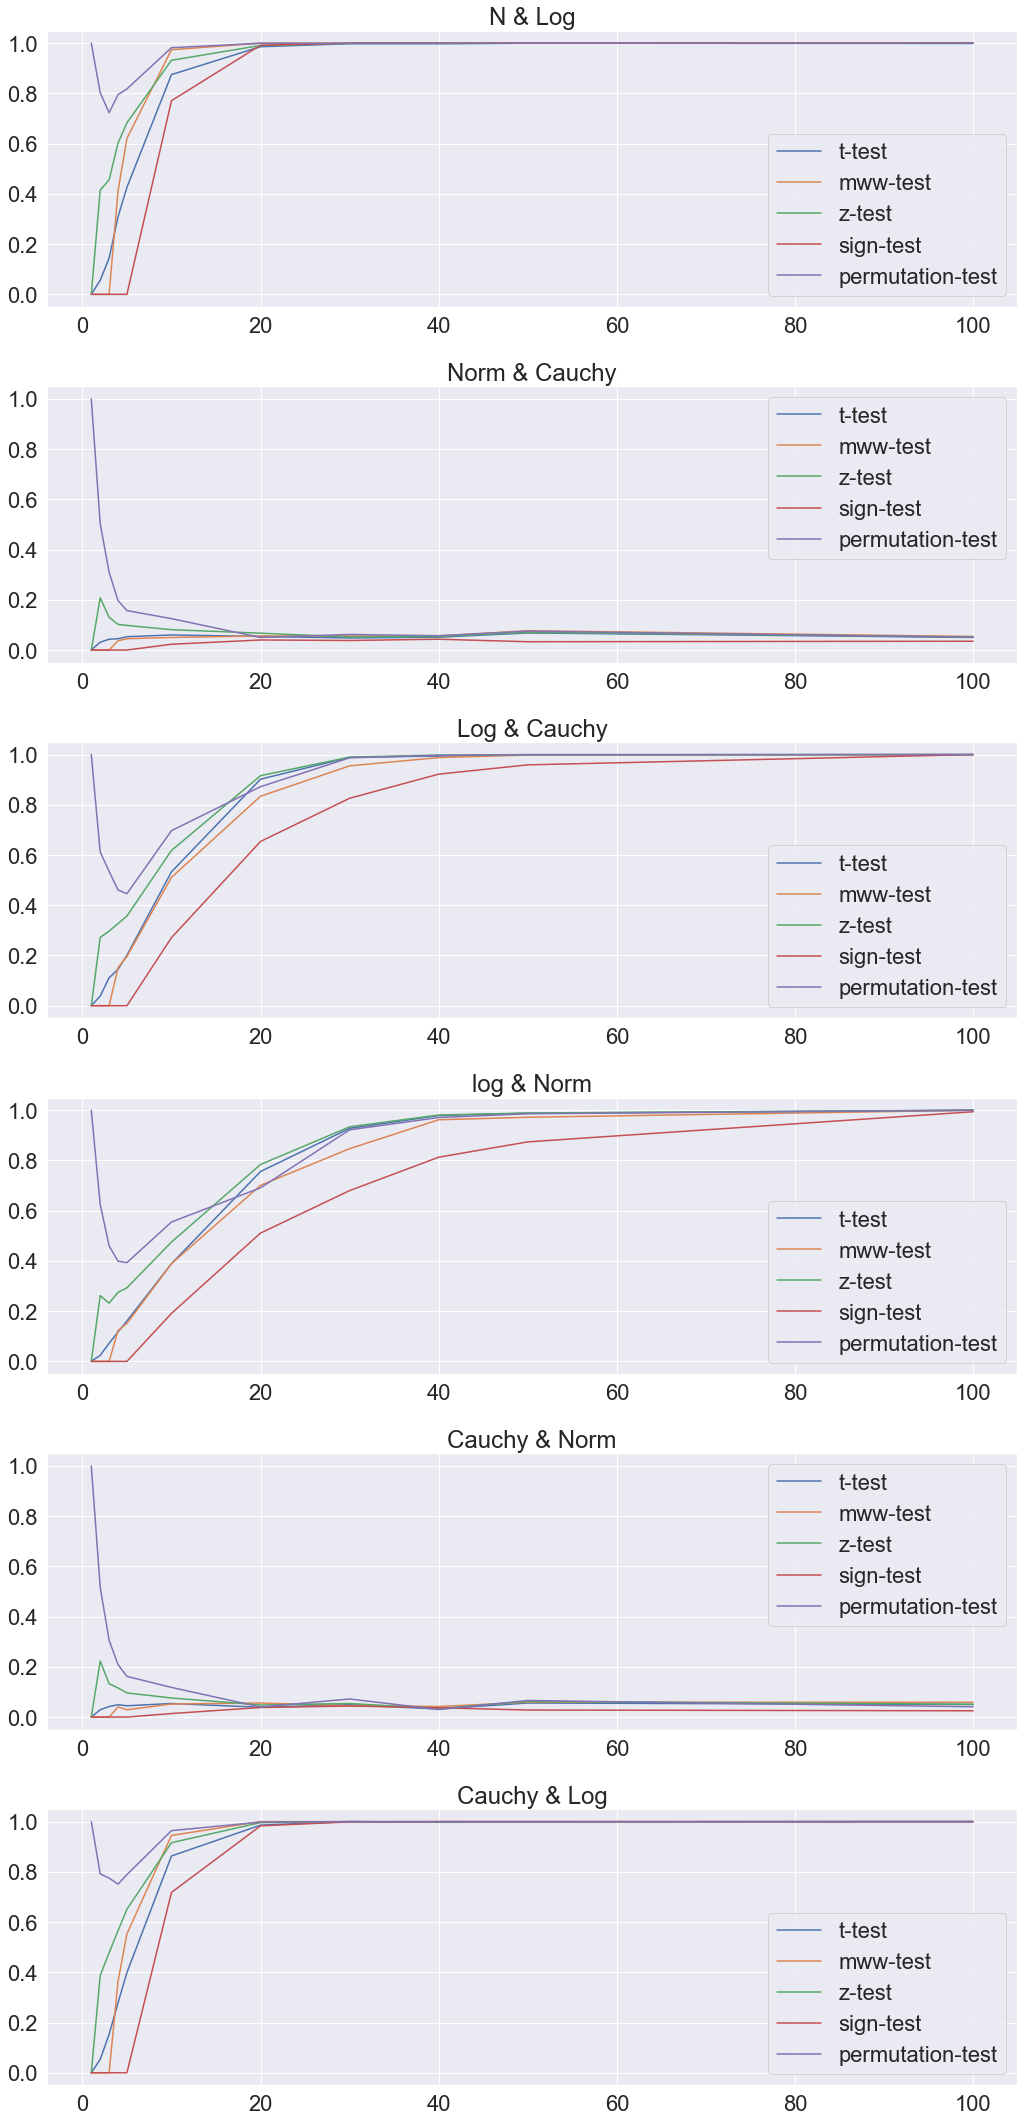

In [166]:
fig, ax = plt.subplots(6, 1, figsize=(15,30))

ax[0].plot(Ns, NL2a_t, label='t-test')
ax[0].plot(Ns, NL2a_mww, label='mww-test')
ax[0].plot(Ns, NL2a_z, label='z-test')
ax[0].plot(Ns, NL2a_sign, label='sign-test')
ax[0].plot(Ns, NL2a_perm, label='permutation-test')
ax[0].legend()
ax[0].title.set_text('N & Log')

ax[1].plot(Ns, NC2a_t, label='t-test')
ax[1].plot(Ns, NC2a_mww, label='mww-test')
ax[1].plot(Ns, NC2a_z, label='z-test')
ax[1].plot(Ns, NC2a_sign, label='sign-test')
ax[1].plot(Ns, NC2a_perm, label='permutation-test')
ax[1].legend()
ax[1].title.set_text('Norm & Cauchy')

ax[2].plot(Ns, LC2a_t, label='t-test')
ax[2].plot(Ns, LC2a_mww, label='mww-test')
ax[2].plot(Ns, LC2a_z, label='z-test')
ax[2].plot(Ns, LC2a_sign, label='sign-test')
ax[2].plot(Ns, LC2a_perm, label='permutation-test')
ax[2].legend()
ax[2].title.set_text('Log & Cauchy')

ax[3].plot(Ns, LNa_t, label='t-test')
ax[3].plot(Ns, LNa_mww, label='mww-test')
ax[3].plot(Ns, LNa_z, label='z-test')
ax[3].plot(Ns, LNa_sign, label='sign-test')
ax[3].plot(Ns, LNa_perm, label='permutation-test')
ax[3].legend()
ax[3].title.set_text('log & Norm')

ax[4].plot(Ns, CNa_t, label='t-test')
ax[4].plot(Ns, CNa_mww, label='mww-test')
ax[4].plot(Ns, CNa_z, label='z-test')
ax[4].plot(Ns, CNa_sign, label='sign-test')
ax[4].plot(Ns, CNa_perm, label='permutation-test')
ax[4].legend()
ax[4].title.set_text('Cauchy & Norm')

ax[5].plot(Ns, CLa_t, label='t-test')
ax[5].plot(Ns, CLa_mww, label='mww-test')
ax[5].plot(Ns, CLa_z, label='z-test')
ax[5].plot(Ns, CLa_sign, label='sign-test')
ax[5].plot(Ns, CLa_perm, label='permutation-test')
ax[5].legend()
ax[5].title.set_text('Cauchy & Log')
fig.tight_layout()

#### 2.D.b) Эксперимент для мощности.

In [ ]:
NL2b_t, NL2b_mww, NL2b_z, NL2b_sign, NL2b_perm = [], [], [], [], []
NC2b_t, NC2b_mww, NC2b_z, NC2b_sign, NC2b_perm = [], [], [], [], []
LC2b_t, LC2b_mww, LC2b_z, LC2b_sign, LC2b_perm = [], [], [], [], []
LNb_t, LNb_mww, LNb_z, LNb_sign, LNb_perm = [], [], [], [], []
CNb_t, CNb_mww, CNb_z, CNb_sign, CNb_perm = [], [], [], [], []
CLb_t, CLb_mww, CLb_z, CLb_sign, CLb_perm = [], [], [], [], []

for n in Ns:
    for mu in np.arange(0.1, 3, 0.1):
        NL2p_t, NL2p_mww, NL2p_z, NL2p_sign, NL2p_perm = [], [], [], [], []
        NC2p_t, NC2p_mww, NC2p_z, NC2p_sign, NC2p_perm = [], [], [], [], []
        LC2p_t, LC2p_mww, LC2p_z, LC2p_sign, LC2p_perm = [], [], [], [], []
        LNp_t, LNp_mww, LNp_z, LNp_sign, LNp_perm = [], [], [], [], []
        CNp_t, CNp_mww, CNp_z, CNp_sign, CNp_perm = [], [], [], [], []
        CLp_t, CLp_mww, CLp_z, CLp_sign, CLp_perm = [], [], [], [], []
        
        for j in range(Nr):
            ####################################
            # Norm & LogN
            X = norm.rvs(loc=mu, scale=1, size=n)
            Y = lognorm.rvs(s=1, loc=mu, scale=2, size=n)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=False)
            NL2p_t.append(p_t)
            
            # z
            X_tmp = stests.DescrStatsW(X)
            Y_tmp = stests.DescrStatsW(Y)
            z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
            NL2p_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            NL2p_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            NL2p_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            NL2p_perm.append(p_p)
            
            ####################################
            # Norm & Cauchy
            X = norm.rvs(loc=mu, scale=1, size=n)
            Y = my_cauchy(n, mu, 2)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=False)
            NC2p_t.append(p_t)
            
            # z
            X_tmp = stests.DescrStatsW(X)
            Y_tmp = stests.DescrStatsW(Y)
            z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
            NC2p_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            NC2p_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            NC2p_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            NC2p_perm.append(p_p)
            
            ####################################
            # LogN & Norm
            X = norm.rvs(loc=mu, scale=2, size=n)
            Y = lognorm.rvs(s=1, loc=mu, scale=1, size=n)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=False)
            LNp_t.append(p_t)
            
            # z
            X_tmp = stests.DescrStatsW(X)
            Y_tmp = stests.DescrStatsW(Y)
            z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
            LNp_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            LNp_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            LNp_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            LNp_perm.append(p_p)
            
            ######################################
            # LogN & Cauchy
            X = lognorm.rvs(s=1, loc=mu, scale=1, size=n)
            Y = my_cauchy(n, mu, 2)
            # X = np.log(X)
            # Y = np.log(Y)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=False)
            LC2p_t.append(p_t)
            
            # z
            X_tmp = stests.DescrStatsW(X)
            Y_tmp = stests.DescrStatsW(Y)
            z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
            LC2p_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            LC2p_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            LC2p_sign.append(p_s)
        
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            LC2p_perm.append(p_p)
            
            ####################################
            # Cauchy & Norm
            X = norm.rvs(loc=mu, scale=2, size=n)
            Y = my_cauchy(n, mu, 1)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=False)
            CNp_t.append(p_t)
            
            # z
            X_tmp = stests.DescrStatsW(X)
            Y_tmp = stests.DescrStatsW(Y)
            z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
            CNp_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            CNp_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            CNp_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            CNp_perm.append(p_p)
            
            ######################################
            # Cauchy & LogN
            X = lognorm.rvs(s=1, loc=mu, scale=2, size=n)
            Y = my_cauchy(n, mu, 1)
            
            # t
            t, p_t = stats.ttest_ind(X, Y, equal_var=False)
            CLp_t.append(p_t)
            
            # z
            X_tmp = stests.DescrStatsW(X)
            Y_tmp = stests.DescrStatsW(Y)
            z, p_z = stests.CompareMeans(X_tmp, Y_tmp).ztest_ind(alternative='two-sided',usevar='unequal', value=0)
            CLp_z.append(p_z)
            
            # mww
            m, p_m = mannwhitneyu(X, Y, alternative='two-sided')
            CLp_mww.append(p_m)
            
            # sign
            Q = X - Y
            s, p_s = sign_test(Q)
            CLp_sign.append(p_s)
            
            # perm
            p_p = permutation_test(X, Y, method='approximate', num_rounds=n, seed=0)
            CLp_perm.append(p_p)
    
        NL2a_t.append((NL2p_t < (alpha * np.ones(Nr))).sum() / Nr)
        NL2a_mww.append((NL2p_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        NL2a_z.append((NL2p_z < (alpha * np.ones(Nr))).sum() / Nr)
        NL2a_sign.append((NL2p_sign < (alpha * np.ones(Nr))).sum() / Nr)
        NL2a_perm.append((NL2p_perm < (alpha * np.ones(Nr))).sum() / Nr)
        
        NC2a_t.append((NC2p_t < (alpha * np.ones(Nr))).sum() / Nr)
        NC2a_mww.append((NC2p_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        NC2a_z.append((NC2p_z < (alpha * np.ones(Nr))).sum() / Nr)
        NC2a_sign.append((NC2p_sign < (alpha * np.ones(Nr))).sum() / Nr)
        NC2a_perm.append((NC2p_perm < (alpha * np.ones(Nr))).sum() / Nr)
            
        LC2a_t.append((LC2p_t < (alpha * np.ones(Nr))).sum() / Nr)
        LC2a_mww.append((LC2p_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        LC2a_z.append((LC2p_z < (alpha * np.ones(Nr))).sum() / Nr)
        LC2a_sign.append((LC2p_sign < (alpha * np.ones(Nr))).sum() / Nr)
        LC2a_perm.append((LC2p_perm < (alpha * np.ones(Nr))).sum() / Nr)
    
        LNa_t.append((LNp_t < (alpha * np.ones(Nr))).sum() / Nr)
        LNa_mww.append((LNp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        LNa_z.append((LNp_z < (alpha * np.ones(Nr))).sum() / Nr)
        LNa_sign.append((LNp_sign < (alpha * np.ones(Nr))).sum() / Nr)
        LNa_perm.append((LNp_perm < (alpha * np.ones(Nr))).sum() / Nr)
        
        CNa_t.append((CNp_t < (alpha * np.ones(Nr))).sum() / Nr)
        CNa_mww.append((CNp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        CNa_z.append((CNp_z < (alpha * np.ones(Nr))).sum() / Nr)
        CNa_sign.append((CNp_sign < (alpha * np.ones(Nr))).sum() / Nr)
        CNa_perm.append((CNp_perm < (alpha * np.ones(Nr))).sum() / Nr)
        
        CLa_t.append((CLp_t < (alpha * np.ones(Nr))).sum() / Nr)
        CLa_mww.append((CLp_mww < (alpha * np.ones(Nr))).sum() / Nr)    
        CLa_z.append((CLp_z < (alpha * np.ones(Nr))).sum() / Nr)
        CLa_sign.append((CLp_sign < (alpha * np.ones(Nr))).sum() / Nr)
        CLa_perm.append((CLp_perm < (alpha * np.ones(Nr))).sum() / Nr) 

# Задача 3

In [182]:
import pandas as pd

In [187]:
! wget  -O 'bombs.csv' -q 'https://raw.githubusercontent.com/SchattenGenie/hse-stats-course-2019/master/homeworks/hw_2/v2_bombing_london.csv'

In [196]:
df = pd.read_csv('bombs.csv')

In [200]:
df.columns

Index(['Unnamed: 0', 'Name', 'Description', 'x', 'y'], dtype='object')

In [216]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [235]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=1,
            radius=100,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [278]:
data = df[(df.x <= -0.03) & (df.x >= -0.16) & (df.y >= 51.48) & (df.y <= 51.55)]

In [279]:
show_circles_on_map(data, "y", "x", "red")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [280]:
len(data)

40

Хотим протестировать:
$$ H_0: F \sim Uniform $$
$$ H_1 : F \nsim  Uniform $$

Разделим нашу карту двумя линиями по диагонали. Тогда, если распределение равномерно, то плотность попадения точки в каждый из полученных 4-х треугольников одинакова, так как их площади равны.


Будем использовать критерий согласия $ \chi^2$
Статистика выглядит так: $\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}$, где 

$E_i = \frac{N}{n}$


$N $ общее количество бомб в прямоугольнике

$n = 4 $ количество зон (треугольников)

$O_i $ количество бомб в зоне (треугольнике)

### 3.1)

In [282]:
alpha = 0.05
N = len(data)
n = 4
E = N/n

Найдем прямые, задающие диагонали прямоугольника

In [285]:
delta_x = -0.03 + 0.16
delta_y = 51.54 - 51.48

In [289]:
k1 = delta_y / delta_x
a1 = k1 * 0.16 + 51.48

In [290]:
k2 = -delta_y / delta_x
a2 = k2 * 0.16 + 51.54

In [291]:
a1

51.55384615384615

In [292]:
a2

51.466153846153844

In [293]:
k1

0.461538461538479

In [294]:
k2

-0.461538461538479

$$y_1 = 0.461538461538479 x + 51.55384615384615$$
$$y_2 = -0.461538461538479 x + 51.466153846153844$$

In [326]:
def observed(x, y, n):
    zones = [ 0 for i in range(n)]
    
    for a, b in zip(x, y):
        y1 = k1 * a + a1
        y2 = k2 * a + a2
        
        if b <= y1 and b >= y2:
            zones[0] += 1
        elif b <= y1 and b <= y2:
            zones[3] += 1
        elif b >= y1 and b >= y2:
            zones[1] += 1
        else:
            zones[2] += 1
    return zones

In [327]:
zones = observed(data['x'], data['y'], n)

In [328]:
zones

[12, 14, 4, 10]

In [322]:
chi = (np.square(np.array(zones) - E) / E).sum()

Тогда для $P(\chi^2 (3) > t) = 0.05$

$t = 7.815$ (по табличке)

И мы отклоняем $H_0$ при $chi > t = 7.815$

In [323]:
chi

5.6

или можно было посчитать так:

In [324]:
from scipy.stats import chisquare

In [325]:
chisquare(zones, f_exp=E * np.ones(len(zones)), ddof=n-1)

Power_divergenceResult(statistic=5.6, pvalue=nan)

Значит нулевая гипотеза не отклоняется

### 3.2)

In [354]:
from scipy.stats import uniform

t = 7.815
cnt = 0
Nr = 10**4

for j in range(Nr):
    n = 4
    N = 1000
    X = uniform.rvs(loc=-0.16, scale=0.13, size=N)
    Y = uniform.rvs(loc=51.48, scale=0.06, size=N)
    
    E = N/n
    
    zns = observed(X, Y, n)
    stat, p = chisquare(zns, f_exp=E * np.ones(len(zns)), ddof=n-1)
    
    cnt += (stat > t)

In [355]:
print('Эмпирическая ошибка 1 рода: ', cnt/Nr)

Эмпирическая ошибка 1 рода:  0.0522


### 3.3)

In [378]:
def observed2(x, y, n):
    zones = [ 0 for i in range(n)]
    
    for a, b in zip(x, y):
        
        if a < -0.16 or a > -0.03:
            continue
        
        y1 = k1 * a + a1
        y2 = k2 * a + a2
        
        if b <= y1 and b >= y2:
            zones[0] += 1
        elif b <= y1 and b <= y2:
            zones[3] += 1
        elif b >= y1 and b >= y2:
            zones[1] += 1
        else:
            zones[2] += 1
    return zones

In [408]:
N = len(data)
n = 4
E = 1000/n
t = 7.815

scale1 = 1/0.13
loc1 = 0.16 * scale1

scale2 = 1/0.06
loc2 = -51.48 * scale2

In [425]:
from scipy.stats import beta

cnt2 = 0
    
for eps in np.arange(-0.9, 2.1, 0.1):
    for i in range(N):
        a, b = 1 + eps, 1 + eps
        
        X = beta.rvs(a, b, size=1000)
        Y = beta.rvs(a, b, size=1000)
        
        X = (X - loc1) /scale1
        Y = (Y - loc2) / scale2
        
        zns = observed2(X, Y, n)
        stat, p = chisquare(zns, f_exp=E * np.ones(len(zns)), ddof=n-1)

        cnt2 += (stat <= t)
        

In [426]:
print('Эмпирическая ошибка 2 рода: ', cnt2 / (N * len(np.arange(-0.9, 2.1, 0.1))))

Эмпирическая ошибка 2 рода:  0.9491666666666667


# Задача 4.

## 4.A)

Пусть людей конечное число -- N. Хотим найти минимальное число тестов (анализов крови) -- n.
Рассмотрим следующую выборку:
$$X_1, ... X_N \sim Bern(N, p)$$
$$p = \frac{\sum_{i=1}^{N} X_i}{N}$$
$$p_0 = \frac{\sum_{i=1}^{n} X_i}{n}$$
Тогда $$H_0: p = p_0$$

Хотим найти вероятность: $P(|p - p_0| <= 0.02) >= 0.95$ или $P(|p - p_0| > 0.02) < 0.05$

Обобщая, $P(|\theta - \hat{\theta}| > \Delta) < \alpha$

$P(\frac{|\theta - \hat{\theta}|}{\sqrt{Var\hat{\theta}}} > z_{\alpha/2}) = P(|\theta - \hat{\theta}| > z_{\alpha/2}\sqrt{Var\hat{\theta}} ) = \alpha$

Тогда $\Delta >= z_{\alpha/2}\sqrt{Var\hat{\theta}} $

$\sigma^2 = Var{\theta} =  Var{p}  \frac{1}{N-1} \sum_{i=1}^{N} (X_i - p)^2 = \dfrac{\sum\limits_{i=1}^{N}X_i-2p\sum\limits_{i=1}^N X_i+Np^2}{N-1} =  \dfrac{Np-2p(Np)+Np^2}{N-1} = \frac{N}{N-1} p(1-p)$

$Var{p_0} =\frac{N-n}{N}\frac{\sigma^2}{n} $ (док-во ниже)


$\Delta >= z_{\alpha/2}\sqrt{\frac{N-n}{N}\frac{\sigma^2}{n}} $

$n >= \dfrac{N \cdot p \cdot (1-p)}{(N-1)\dfrac{\Delta^2}{z^2_{\alpha/2}}+p\cdot(1-p)}$

Теперь, в нашем случае:

$\Delta = 0.02$

$z_{0.025} = 1.96$

$N < \infty $

In [428]:
delta = 0.02
z = 1.96

In [431]:
delta**2 / z ** 2

0.00010412328196584758

$n >= \dfrac{N \cdot p_0 \cdot (1-p_0)}{(N-1)[0.00010412328196584758]+p_0\cdot(1-p_0)}$

Допустим, перед нами худший случай и $p_0 = 0.5$

In [489]:
N = np.arange(1, 3000, 100)
p = 0.5 * 0.5
C = delta**2 / z ** 2
N2 = N*p  / ((N-1) * C + p)

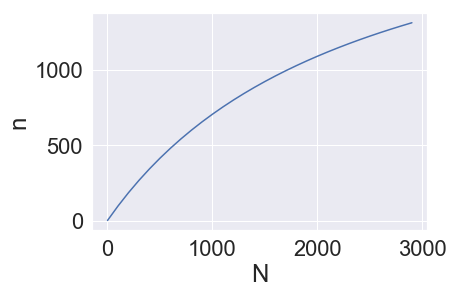

In [490]:
plt.plot(N, N2)
plt.xlabel('N')
plt.ylabel('n')
plt.show()


Докажем, что $Var\hat{\theta} = Var{p_0} =\frac{N-n}{N}\frac{\sigma^2}{n} $

1. Скажем $\frac{1}{n} \sum^n X_{i} = \frac{1}{n} \sum^N t_{i}Y_{i}$, где $t_{i} = Ind[X_{i}]$


2. $Var{p_0} = \frac{1}{n} \sum^N t_{i}Y_{i} = \frac{1}{n^2}[\sum^N Y_{i}^2 Var(t_{i}) + 2\sum_{i<j} Y_{i} Y_{j} cov(t_{i}, t_{j})]$

3. Так как $t_i$ - индикатор принимающий значение 1 с вероятностью n/N, то $Var(t_{i}) = E(t_{i} ^2) - (E(t_{i}))^2 = \frac{n}{N} - (\frac{n}{N})^2 = \frac{n(N-n)}{N^2}$

4. $\mathbb{E} \left[ t_{i} t_j \right] = P(t_i = 1, t_j = 1) = \frac{n}{N} \frac{n-1}{N-1}$,

5. $\operatorname{Cov} \left( t_i, t_j \right) =  \mathbb{E} \left[ t_i t_j \right]  - 
\mathbb{E} \left[ t_i \right] \mathbb{E} \left[ t_j \right] = \frac{n}{N} \frac{n-1}{N-1} - \frac{n^2}{N^2} = - \frac{n(1 - \frac{n}{N})}{N(N-1)}$


6. Тогда подставляя получаем: 

$Var{p_0} = \frac{(N-n)}{n N^2} \left[ \sum_{j=1}^{N} Y_j^2  - 2 \frac{1}{(N-1)} \sum_{i \lt j} Y_i Y_j \right]$

7. Заметим, что выражение в собках это sigma^2 так как

$\tilde \sigma^2 = \frac{1}{N} \sum_{j=1}^{N} \left ( y_j - \bar y \right)^2 = \frac{1}{N} ( \sum_{j=1}^{N} y_j^2 - N \bar y ^2)
$

$\bar{y^2} = \left( \frac{1}{N} \sum_{j=1}^{N} y_j \right)^2 = \frac{1}{N^2} \left[  \sum_{j=1}^{N} y_j^2  + 2 \sum_{i \lt j} y_i y_j   \right]$

8. Получаем

$Var{p_0} =\frac{N-n}{N}\frac{\sigma^2}{n} $

## 4.B)

Теперь, если $N \rightarrow \infty$,
то $$n >= \dfrac{N \cdot p_0 \cdot (1-p_0)}{(N-1)[0.00010412328196584758]+p_0\cdot(1-p_0)} \rightarrow \dfrac{p_0 \cdot (1-p_0)}{\frac{N-1}{N}[0.00010412328196584758]+\frac{p_0\cdot(1-p_0)}{N}} \rightarrow \frac{p_0(1-p_0)}{0.00010412328196584758}$$

In [447]:
p = np.arange(0, 1.05, 0.05)
p2 = p*(1-p)
C = delta**2 / z ** 2

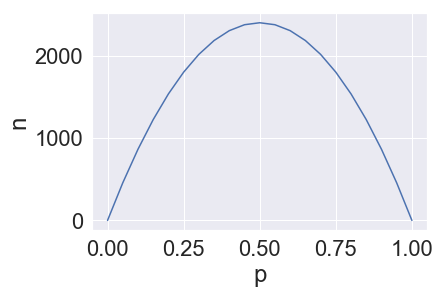

In [455]:
plt.plot(p, p2 / C)
plt.ylabel('n')
plt.xlabel('p')
plt.show()